# Visualize per method segmentation
4 methods

Processing: BA_10622.jpg


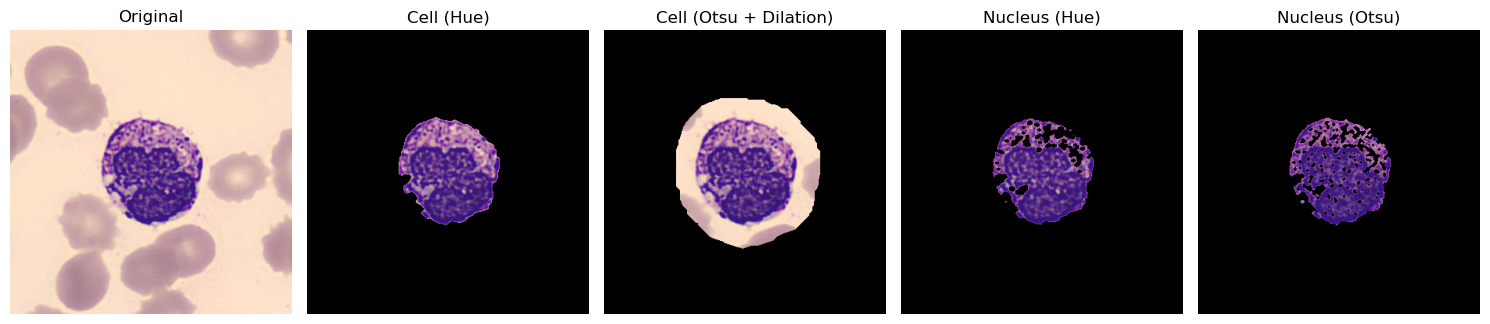

Processing: ERB_111235.jpg


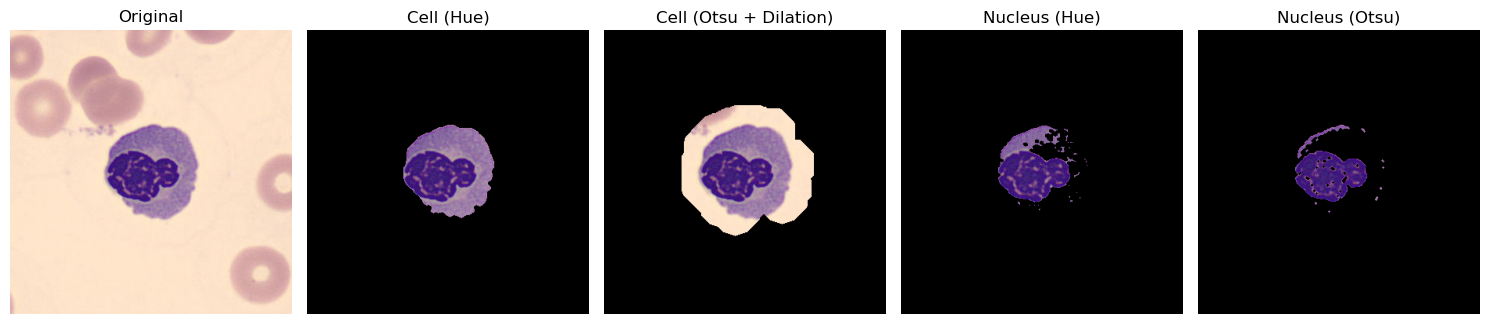

Processing: MO_100695.jpg


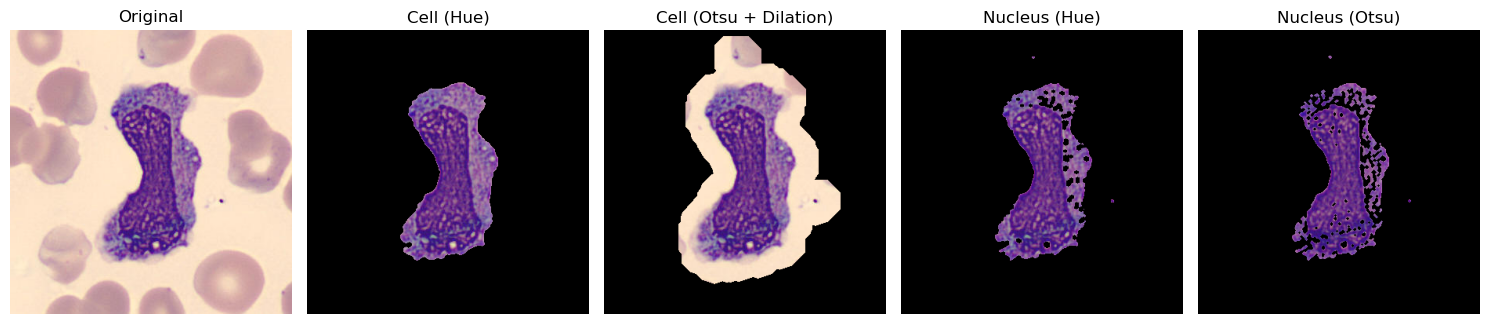

Processing: MYO_0018.jpg


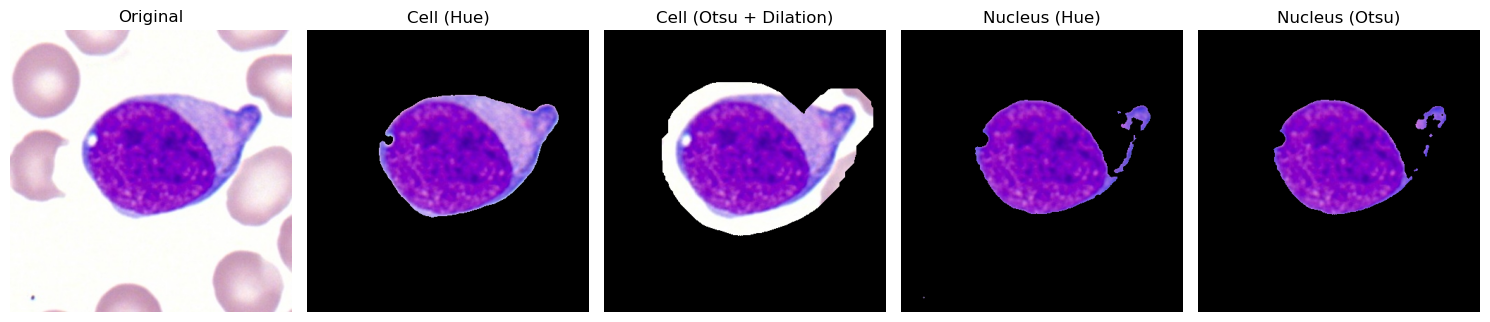

Processing: NGS_0122.jpg


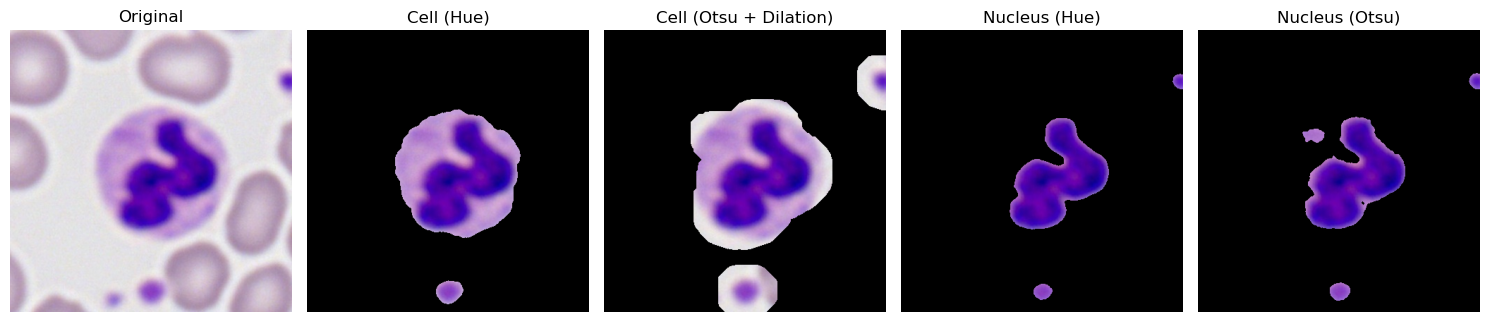

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ==== Set paths ====
folder_path = r"C:\Users\Enas Emad\Documents\AML\example"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
image_files = image_files[:5]  # Limit for testing

# ==== Load all test functions ====
from segmentation_methods import (
    segment_cell_hue_channel,
    segment_cell_otsu_dilation,
    segment_nucleus_hue_channel,
    segment_nucleus_otsu
)

# ==== Visualization ====
def visualize_results(bgr_img, seg_funcs, titles):
    rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 8))
    plt.subplot(2, len(seg_funcs) + 2, 1)
    plt.imshow(rgb)
    plt.title("Original")
    plt.axis('off')

    # Segment using hue method outside loop
    segmented_cell_hue, _ = segment_cell_hue_channel(rgb, darken_factor=0.6)
    plt.subplot(2, len(seg_funcs) + 2, 2)
    plt.imshow(segmented_cell_hue)
    plt.title("Cell (Hue)")
    plt.axis('off')

    for i, (func, title) in enumerate(zip(seg_funcs, titles)):
        segmented_img, mask = func(bgr_img)

        # Convert grayscale mask to RGB if needed
        if segmented_img.ndim == 2:
            rgb_img = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2RGB)
        else:
            rgb_img = segmented_img

        plt.subplot(2, len(seg_funcs) + 2, i + 3)
        plt.imshow(rgb_img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ==== Run on test images ====
for file_name in image_files:
    img_path = os.path.join(folder_path, file_name)
    bgr_img = cv2.imread(img_path)
    if bgr_img is None:
        print(f"Skipped unreadable image: {file_name}")
        continue

    print(f"Processing: {file_name}")
    visualize_results(
        bgr_img,
        seg_funcs=[
            segment_cell_otsu_dilation,
            segment_nucleus_hue_channel,
            segment_nucleus_otsu
        ],
        titles=[
            "Cell (Otsu + Dilation)",
            "Nucleus (Hue)",
            "Nucleus (Otsu)"
        ]
    )


# Apply segmentations and save segmented image

## cell_hue

In [24]:
import os
import cv2
import numpy as np
from segmentation_methods import segment_cell_hue_channel

# ==== Paths ====
data_root = r"C:\Users\Enas Emad\Documents\AML\data"
output_dir = r"C:\Users\Enas Emad\Documents\AML\segmented\cell_hue"

# ==== Prepare output folders ====
os.makedirs(output_dir, exist_ok=True)

# ==== Class folders ====
class_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]

for class_name in class_folders:
    class_input_path = os.path.join(data_root, class_name)
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"\nProcessing class: {class_name} ({len(image_files)} images)")

    for file_name in image_files:
        img_path = os.path.join(class_input_path, file_name)
        bgr_img = cv2.imread(img_path)

        if bgr_img is None:
            print(f"Skipped unreadable image: {file_name}")
            continue

        rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        segmented_img, _ = segment_cell_hue_channel(rgb_img, darken_factor=0.6)

        save_path = os.path.join(class_output_path, file_name)
        cv2.imwrite(save_path, cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR))

        print(f"Saved: {file_name}")



Processing class: basophil (1000 images)
Saved: BA_100102.jpg
Saved: BA_101381.jpg
Saved: BA_101611.jpg
Saved: BA_102039.jpg
Saved: BA_10622.jpg
Saved: BA_107595.jpg
Saved: BA_111710.jpg
Saved: BA_112418.jpg
Saved: BA_114542.jpg
Saved: BA_114899.jpg
Saved: BA_115323.jpg
Saved: BA_116477.jpg
Saved: BA_119131.jpg
Saved: BA_120278.jpg
Saved: BA_120688.jpg
Saved: BA_121453.jpg
Saved: BA_121897.jpg
Saved: BA_1223.jpg
Saved: BA_124389.jpg
Saved: BA_124620.jpg
Saved: BA_124938.jpg
Saved: BA_126411.jpg
Saved: BA_126424.jpg
Saved: BA_126839.jpg
Saved: BA_127306.jpg
Saved: BA_127671.jpg
Saved: BA_127868.jpg
Saved: BA_128084.jpg
Saved: BA_128423.jpg
Saved: BA_129537.jpg
Saved: BA_129641.jpg
Saved: BA_130831.jpg
Saved: BA_131174.jpg
Saved: BA_139275.jpg
Saved: BA_139552.jpg
Saved: BA_139733.jpg
Saved: BA_141630.jpg
Saved: BA_143059.jpg
Saved: BA_144863.jpg
Saved: BA_145728.jpg
Saved: BA_147282.jpg
Saved: BA_147402.jpg
Saved: BA_151210.jpg
Saved: BA_152650.jpg
Saved: BA_152708.jpg
Saved: BA_153085

Saved: BA_453322.jpg
Saved: BA_453670.jpg
Saved: BA_454831.jpg
Saved: BA_455128.jpg
Saved: BA_455523.jpg
Saved: BA_45632.jpg
Saved: BA_457610.jpg
Saved: BA_458363.jpg
Saved: BA_459209.jpg
Saved: BA_461900.jpg
Saved: BA_461909.jpg
Saved: BA_462301.jpg
Saved: BA_462426.jpg
Saved: BA_462686.jpg
Saved: BA_462792.jpg
Saved: BA_463171.jpg
Saved: BA_463847.jpg
Saved: BA_464087.jpg
Saved: BA_464090.jpg
Saved: BA_466566.jpg
Saved: BA_46660.jpg
Saved: BA_468972.jpg
Saved: BA_472351.jpg
Saved: BA_472669.jpg
Saved: BA_472802.jpg
Saved: BA_473295.jpg
Saved: BA_474348.jpg
Saved: BA_4744.jpg
Saved: BA_475530.jpg
Saved: BA_476192.jpg
Saved: BA_476625.jpg
Saved: BA_477049.jpg
Saved: BA_478314.jpg
Saved: BA_479247.jpg
Saved: BA_481299.jpg
Saved: BA_481414.jpg
Saved: BA_482919.jpg
Saved: BA_482920.jpg
Saved: BA_484151.jpg
Saved: BA_484450.jpg
Saved: BA_484573.jpg
Saved: BA_485187.jpg
Saved: BA_485601.jpg
Saved: BA_486837.jpg
Saved: BA_487129.jpg
Saved: BA_488451.jpg
Saved: BA_48862.jpg
Saved: BA_490072.j

Saved: BA_817890.jpg
Saved: BA_818588.jpg
Saved: BA_81869.jpg
Saved: BA_819177.jpg
Saved: BA_820417.jpg
Saved: BA_821772.jpg
Saved: BA_82322.jpg
Saved: BA_824665.jpg
Saved: BA_825338.jpg
Saved: BA_825699.jpg
Saved: BA_827021.jpg
Saved: BA_827257.jpg
Saved: BA_827566.jpg
Saved: BA_828657.jpg
Saved: BA_830328.jpg
Saved: BA_830805.jpg
Saved: BA_831290.jpg
Saved: BA_832900.jpg
Saved: BA_833409.jpg
Saved: BA_834693.jpg
Saved: BA_834949.jpg
Saved: BA_835431.jpg
Saved: BA_836099.jpg
Saved: BA_836586.jpg
Saved: BA_837965.jpg
Saved: BA_83911.jpg
Saved: BA_839500.jpg
Saved: BA_839707.jpg
Saved: BA_840272.jpg
Saved: BA_84086.jpg
Saved: BA_842435.jpg
Saved: BA_84276.jpg
Saved: BA_842957.jpg
Saved: BA_844617.jpg
Saved: BA_845115.jpg
Saved: BA_845828.jpg
Saved: BA_848804.jpg
Saved: BA_849105.jpg
Saved: BA_849533.jpg
Saved: BA_849723.jpg
Saved: BA_852185.jpg
Saved: BA_853366.jpg
Saved: BA_854375.jpg
Saved: BA_854946.jpg
Saved: BA_855006.jpg
Saved: BA_855901.jpg
Saved: BA_855924.jpg
Saved: BA_858229.j

Saved: ERB_209277.jpg
Saved: ERB_209319.jpg
Saved: ERB_209734.jpg
Saved: ERB_210322.jpg
Saved: ERB_211807.jpg
Saved: ERB_212083.jpg
Saved: ERB_21312.jpg
Saved: ERB_214204.jpg
Saved: ERB_214210.jpg
Saved: ERB_214915.jpg
Saved: ERB_215033.jpg
Saved: ERB_215077.jpg
Saved: ERB_215260.jpg
Saved: ERB_215265.jpg
Saved: ERB_21576.jpg
Saved: ERB_2158.jpg
Saved: ERB_216040.jpg
Saved: ERB_216622.jpg
Saved: ERB_21715.jpg
Saved: ERB_217339.jpg
Saved: ERB_21736.jpg
Saved: ERB_217606.jpg
Saved: ERB_218522.jpg
Saved: ERB_219791.jpg
Saved: ERB_22055.jpg
Saved: ERB_220917.jpg
Saved: ERB_221485.jpg
Saved: ERB_221964.jpg
Saved: ERB_222683.jpg
Saved: ERB_222791.jpg
Saved: ERB_222938.jpg
Saved: ERB_223475.jpg
Saved: ERB_223548.jpg
Saved: ERB_224354.jpg
Saved: ERB_22541.jpg
Saved: ERB_225431.jpg
Saved: ERB_226177.jpg
Saved: ERB_226523.jpg
Saved: ERB_22703.jpg
Saved: ERB_228522.jpg
Saved: ERB_231898.jpg
Saved: ERB_23214.jpg
Saved: ERB_232331.jpg
Saved: ERB_232452.jpg
Saved: ERB_232473.jpg
Saved: ERB_233.jpg
S

Saved: ERB_432707.jpg
Saved: ERB_433026.jpg
Saved: ERB_43309.jpg
Saved: ERB_433874.jpg
Saved: ERB_434293.jpg
Saved: ERB_435333.jpg
Saved: ERB_435689.jpg
Saved: ERB_436065.jpg
Saved: ERB_436530.jpg
Saved: ERB_436924.jpg
Saved: ERB_437126.jpg
Saved: ERB_438007.jpg
Saved: ERB_438112.jpg
Saved: ERB_439731.jpg
Saved: ERB_440580.jpg
Saved: ERB_440948.jpg
Saved: ERB_442642.jpg
Saved: ERB_442855.jpg
Saved: ERB_443599.jpg
Saved: ERB_4438.jpg
Saved: ERB_444417.jpg
Saved: ERB_444576.jpg
Saved: ERB_445549.jpg
Saved: ERB_445589.jpg
Saved: ERB_445758.jpg
Saved: ERB_448264.jpg
Saved: ERB_448433.jpg
Saved: ERB_449098.jpg
Saved: ERB_449392.jpg
Saved: ERB_451325.jpg
Saved: ERB_452211.jpg
Saved: ERB_452425.jpg
Saved: ERB_453317.jpg
Saved: ERB_453505.jpg
Saved: ERB_454250.jpg
Saved: ERB_454392.jpg
Saved: ERB_454550.jpg
Saved: ERB_454654.jpg
Saved: ERB_455306.jpg
Saved: ERB_455657.jpg
Saved: ERB_456209.jpg
Saved: ERB_45655.jpg
Saved: ERB_456967.jpg
Saved: ERB_456982.jpg
Saved: ERB_459626.jpg
Saved: ERB_460

Saved: ERB_670267.jpg
Saved: ERB_671418.jpg
Saved: ERB_672860.jpg
Saved: ERB_673280.jpg
Saved: ERB_673446.jpg
Saved: ERB_673516.jpg
Saved: ERB_674367.jpg
Saved: ERB_674488.jpg
Saved: ERB_675364.jpg
Saved: ERB_675547.jpg
Saved: ERB_676389.jpg
Saved: ERB_676437.jpg
Saved: ERB_677247.jpg
Saved: ERB_677279.jpg
Saved: ERB_678282.jpg
Saved: ERB_678790.jpg
Saved: ERB_678821.jpg
Saved: ERB_678963.jpg
Saved: ERB_679990.jpg
Saved: ERB_681068.jpg
Saved: ERB_682251.jpg
Saved: ERB_682853.jpg
Saved: ERB_682893.jpg
Saved: ERB_683211.jpg
Saved: ERB_683802.jpg
Saved: ERB_68445.jpg
Saved: ERB_685.jpg
Saved: ERB_685356.jpg
Saved: ERB_685726.jpg
Saved: ERB_686342.jpg
Saved: ERB_686500.jpg
Saved: ERB_686677.jpg
Saved: ERB_687354.jpg
Saved: ERB_688898.jpg
Saved: ERB_689453.jpg
Saved: ERB_69020.jpg
Saved: ERB_690928.jpg
Saved: ERB_690949.jpg
Saved: ERB_691430.jpg
Saved: ERB_692098.jpg
Saved: ERB_692179.jpg
Saved: ERB_692381.jpg
Saved: ERB_692442.jpg
Saved: ERB_692603.jpg
Saved: ERB_692858.jpg
Saved: ERB_6931

Saved: MO_382804.jpg
Saved: MO_383141.jpg
Saved: MO_384012.jpg
Saved: MO_385020.jpg
Saved: MO_385446.jpg
Saved: MO_386754.jpg
Saved: MO_38756.jpg
Saved: MO_387936.jpg
Saved: MO_38915.jpg
Saved: MO_389357.jpg
Saved: MO_389525.jpg
Saved: MO_392030.jpg
Saved: MO_392040.jpg
Saved: MO_392815.jpg
Saved: MO_394173.jpg
Saved: MO_394238.jpg
Saved: MO_394926.jpg
Saved: MO_396043.jpg
Saved: MO_397136.jpg
Saved: MO_399159.jpg
Saved: MO_399228.jpg
Saved: MO_399473.jpg
Saved: MO_400472.jpg
Saved: MO_401220.jpg
Saved: MO_402348.jpg
Saved: MO_402875.jpg
Saved: MO_402936.jpg
Saved: MO_403840.jpg
Saved: MO_406112.jpg
Saved: MO_406508.jpg
Saved: MO_406701.jpg
Saved: MO_408033.jpg
Saved: MO_408876.jpg
Saved: MO_409354.jpg
Saved: MO_409710.jpg
Saved: MO_409991.jpg
Saved: MO_412978.jpg
Saved: MO_413052.jpg
Saved: MO_413572.jpg
Saved: MO_415531.jpg
Saved: MO_416862.jpg
Saved: MO_417142.jpg
Saved: MO_417384.jpg
Saved: MO_417623.jpg
Saved: MO_420300.jpg
Saved: MO_420359.jpg
Saved: MO_421188.jpg
Saved: MO_42175

Saved: MO_753429.jpg
Saved: MO_755262.jpg
Saved: MO_757550.jpg
Saved: MO_7582.jpg
Saved: MO_758331.jpg
Saved: MO_760420.jpg
Saved: MO_76055.jpg
Saved: MO_761438.jpg
Saved: MO_76193.jpg
Saved: MO_762364.jpg
Saved: MO_763206.jpg
Saved: MO_763772.jpg
Saved: MO_764487.jpg
Saved: MO_765341.jpg
Saved: MO_766373.jpg
Saved: MO_766420.jpg
Saved: MO_767104.jpg
Saved: MO_767746.jpg
Saved: MO_767982.jpg
Saved: MO_768683.jpg
Saved: MO_768896.jpg
Saved: MO_768961.jpg
Saved: MO_769640.jpg
Saved: MO_770250.jpg
Saved: MO_770267.jpg
Saved: MO_770326.jpg
Saved: MO_770459.jpg
Saved: MO_770728.jpg
Saved: MO_771012.jpg
Saved: MO_771055.jpg
Saved: MO_771921.jpg
Saved: MO_772460.jpg
Saved: MO_773253.jpg
Saved: MO_774156.jpg
Saved: MO_774513.jpg
Saved: MO_775072.jpg
Saved: MO_77553.jpg
Saved: MO_775807.jpg
Saved: MO_775809.jpg
Saved: MO_775971.jpg
Saved: MO_776848.jpg
Saved: MO_777817.jpg
Saved: MO_778100.jpg
Saved: MO_778332.jpg
Saved: MO_778543.jpg
Saved: MO_779116.jpg
Saved: MO_779918.jpg
Saved: MO_781541.j

Saved: MYO_0263.jpg
Saved: MYO_0264.jpg
Saved: MYO_0265.jpg
Saved: MYO_0269.jpg
Saved: MYO_0272.jpg
Saved: MYO_0273.jpg
Saved: MYO_0274.jpg
Saved: MYO_0275.jpg
Saved: MYO_0276.jpg
Saved: MYO_0278.jpg
Saved: MYO_0279.jpg
Saved: MYO_0280.jpg
Saved: MYO_0281.jpg
Saved: MYO_0283.jpg
Saved: MYO_0287.jpg
Saved: MYO_0289.jpg
Saved: MYO_0292.jpg
Saved: MYO_0294.jpg
Saved: MYO_0297.jpg
Saved: MYO_0299.jpg
Saved: MYO_0300.jpg
Saved: MYO_0301.jpg
Saved: MYO_0302.jpg
Saved: MYO_0303.jpg
Saved: MYO_0306.jpg
Saved: MYO_0309.jpg
Saved: MYO_0310.jpg
Saved: MYO_0311.jpg
Saved: MYO_0315.jpg
Saved: MYO_0319.jpg
Saved: MYO_0322.jpg
Saved: MYO_0323.jpg
Saved: MYO_0324.jpg
Saved: MYO_0327.jpg
Saved: MYO_0332.jpg
Saved: MYO_0337.jpg
Saved: MYO_0338.jpg
Saved: MYO_0339.jpg
Saved: MYO_0340.jpg
Saved: MYO_0341.jpg
Saved: MYO_0342.jpg
Saved: MYO_0343.jpg
Saved: MYO_0344.jpg
Saved: MYO_0345.jpg
Saved: MYO_0350.jpg
Saved: MYO_0352.jpg
Saved: MYO_0355.jpg
Saved: MYO_0362.jpg
Saved: MYO_0363.jpg
Saved: MYO_0364.jpg


Saved: MYO_1196.jpg
Saved: MYO_1197.jpg
Saved: MYO_1198.jpg
Saved: MYO_1201.jpg
Saved: MYO_1203.jpg
Saved: MYO_1205.jpg
Saved: MYO_1210.jpg
Saved: MYO_1212.jpg
Saved: MYO_1216.jpg
Saved: MYO_1217.jpg
Saved: MYO_1219.jpg
Saved: MYO_1220.jpg
Saved: MYO_1221.jpg
Saved: MYO_1224.jpg
Saved: MYO_1225.jpg
Saved: MYO_1227.jpg
Saved: MYO_1229.jpg
Saved: MYO_1233.jpg
Saved: MYO_1234.jpg
Saved: MYO_1237.jpg
Saved: MYO_1239.jpg
Saved: MYO_1244.jpg
Saved: MYO_1245.jpg
Saved: MYO_1246.jpg
Saved: MYO_1247.jpg
Saved: MYO_1250.jpg
Saved: MYO_1251.jpg
Saved: MYO_1252.jpg
Saved: MYO_1255.jpg
Saved: MYO_1257.jpg
Saved: MYO_1258.jpg
Saved: MYO_1259.jpg
Saved: MYO_1261.jpg
Saved: MYO_1265.jpg
Saved: MYO_1266.jpg
Saved: MYO_1270.jpg
Saved: MYO_1273.jpg
Saved: MYO_1279.jpg
Saved: MYO_1282.jpg
Saved: MYO_1283.jpg
Saved: MYO_1284.jpg
Saved: MYO_1286.jpg
Saved: MYO_1292.jpg
Saved: MYO_1298.jpg
Saved: MYO_1301.jpg
Saved: MYO_1302.jpg
Saved: MYO_1304.jpg
Saved: MYO_1307.jpg
Saved: MYO_1308.jpg
Saved: MYO_1309.jpg


Saved: MYO_2069.jpg
Saved: MYO_2072.jpg
Saved: MYO_2073.jpg
Saved: MYO_2080.jpg
Saved: MYO_2081.jpg
Saved: MYO_2082.jpg
Saved: MYO_2085.jpg
Saved: MYO_2086.jpg
Saved: MYO_2087.jpg
Saved: MYO_2088.jpg
Saved: MYO_2089.jpg
Saved: MYO_2094.jpg
Saved: MYO_2096.jpg
Saved: MYO_2099.jpg
Saved: MYO_2101.jpg
Saved: MYO_2107.jpg
Saved: MYO_2111.jpg
Saved: MYO_2113.jpg
Saved: MYO_2120.jpg
Saved: MYO_2122.jpg
Saved: MYO_2124.jpg
Saved: MYO_2125.jpg
Saved: MYO_2127.jpg
Saved: MYO_2128.jpg
Saved: MYO_2129.jpg
Saved: MYO_2132.jpg
Saved: MYO_2134.jpg
Saved: MYO_2138.jpg
Saved: MYO_2139.jpg
Saved: MYO_2140.jpg
Saved: MYO_2141.jpg
Saved: MYO_2144.jpg
Saved: MYO_2146.jpg
Saved: MYO_2150.jpg
Saved: MYO_2151.jpg
Saved: MYO_2152.jpg
Saved: MYO_2154.jpg
Saved: MYO_2156.jpg
Saved: MYO_2157.jpg
Saved: MYO_2161.jpg
Saved: MYO_2162.jpg
Saved: MYO_2163.jpg
Saved: MYO_2164.jpg
Saved: MYO_2169.jpg
Saved: MYO_2170.jpg
Saved: MYO_2172.jpg
Saved: MYO_2174.jpg
Saved: MYO_2177.jpg
Saved: MYO_2179.jpg
Saved: MYO_2184.jpg


Saved: NGS_2952.jpg
Saved: NGS_2957.jpg
Saved: NGS_2966.jpg
Saved: NGS_2972.jpg
Saved: NGS_2973.jpg
Saved: NGS_2975.jpg
Saved: NGS_2976.jpg
Saved: NGS_2994.jpg
Saved: NGS_2995.jpg
Saved: NGS_3002.jpg
Saved: NGS_3006.jpg
Saved: NGS_3013.jpg
Saved: NGS_3017.jpg
Saved: NGS_3024.jpg
Saved: NGS_3027.jpg
Saved: NGS_3040.jpg
Saved: NGS_3046.jpg
Saved: NGS_3050.jpg
Saved: NGS_3054.jpg
Saved: NGS_3068.jpg
Saved: NGS_3077.jpg
Saved: NGS_3080.jpg
Saved: NGS_3084.jpg
Saved: NGS_3087.jpg
Saved: NGS_3103.jpg
Saved: NGS_3106.jpg
Saved: NGS_3121.jpg
Saved: NGS_3125.jpg
Saved: NGS_3126.jpg
Saved: NGS_3141.jpg
Saved: NGS_3155.jpg
Saved: NGS_3181.jpg
Saved: NGS_3182.jpg
Saved: NGS_3184.jpg
Saved: NGS_3186.jpg
Saved: NGS_3208.jpg
Saved: NGS_3212.jpg
Saved: NGS_3235.jpg
Saved: NGS_3245.jpg
Saved: NGS_3260.jpg
Saved: NGS_3274.jpg
Saved: NGS_3275.jpg
Saved: NGS_3293.jpg
Saved: NGS_3296.jpg
Saved: NGS_3298.jpg
Saved: NGS_3306.jpg
Saved: NGS_3312.jpg
Saved: NGS_3324.jpg
Saved: NGS_3335.jpg
Saved: NGS_3336.jpg


Saved: NGS_6587.jpg
Saved: NGS_6603.jpg
Saved: NGS_6611.jpg
Saved: NGS_6615.jpg
Saved: NGS_6617.jpg
Saved: NGS_6624.jpg
Saved: NGS_6640.jpg
Saved: NGS_6652.jpg
Saved: NGS_6661.jpg
Saved: NGS_6665.jpg
Saved: NGS_6669.jpg
Saved: NGS_6670.jpg
Saved: NGS_6675.jpg
Saved: NGS_6677.jpg
Saved: NGS_6685.jpg
Saved: NGS_6691.jpg
Saved: NGS_6705.jpg
Saved: NGS_6706.jpg
Saved: NGS_6716.jpg
Saved: NGS_6720.jpg
Saved: NGS_6727.jpg
Saved: NGS_6728.jpg
Saved: NGS_6732.jpg
Saved: NGS_6742.jpg
Saved: NGS_6753.jpg
Saved: NGS_6756.jpg
Saved: NGS_6771.jpg
Saved: NGS_6773.jpg
Saved: NGS_6777.jpg
Saved: NGS_6779.jpg
Saved: NGS_6782.jpg
Saved: NGS_6793.jpg
Saved: NGS_6797.jpg
Saved: NGS_6802.jpg
Saved: NGS_6805.jpg
Saved: NGS_6809.jpg
Saved: NGS_6816.jpg
Saved: NGS_6819.jpg
Saved: NGS_6822.jpg
Saved: NGS_6826.jpg
Saved: NGS_6838.jpg
Saved: NGS_6840.jpg
Saved: NGS_6860.jpg
Saved: NGS_6862.jpg
Saved: NGS_6886.jpg
Saved: NGS_6887.jpg
Saved: NGS_6892.jpg
Saved: NGS_6900.jpg
Saved: NGS_6903.jpg
Saved: NGS_6913.jpg


## segment_cell_otsu_dilation

In [26]:
import os
import cv2
from segmentation_methods import segment_cell_otsu_dilation

# ==== Paths ====
data_root = r"C:\Users\Enas Emad\Documents\AML\data"
output_dir = r"C:\Users\Enas Emad\Documents\AML\segmented\cell_otsu_dilation"

# ==== Prepare output folders ====
os.makedirs(output_dir, exist_ok=True)

# ==== Class folders ====
class_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]

for class_name in class_folders:
    class_input_path = os.path.join(data_root, class_name)
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"\nProcessing class: {class_name} ({len(image_files)} images)")

    for file_name in image_files:
        img_path = os.path.join(class_input_path, file_name)
        bgr_img = cv2.imread(img_path)

        if bgr_img is None:
            print(f"Skipped unreadable image: {file_name}")
            continue

        segmented_img, mask = segment_cell_otsu_dilation(bgr_img)

        # Convert mask to binary
        if mask.ndim == 3:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

        # Apply mask to original image to retain original colors
        segmented_color = cv2.bitwise_and(bgr_img, bgr_img, mask=binary_mask)

        save_path = os.path.join(class_output_path, file_name)
        cv2.imwrite(save_path, segmented_color)

        print(f"Saved: {file_name}")



Processing class: basophil (1000 images)
Saved: BA_100102.jpg
Saved: BA_101381.jpg
Saved: BA_101611.jpg
Saved: BA_102039.jpg
Saved: BA_10622.jpg
Saved: BA_107595.jpg
Saved: BA_111710.jpg
Saved: BA_112418.jpg
Saved: BA_114542.jpg
Saved: BA_114899.jpg
Saved: BA_115323.jpg
Saved: BA_116477.jpg
Saved: BA_119131.jpg
Saved: BA_120278.jpg
Saved: BA_120688.jpg
Saved: BA_121453.jpg
Saved: BA_121897.jpg
Saved: BA_1223.jpg
Saved: BA_124389.jpg
Saved: BA_124620.jpg
Saved: BA_124938.jpg
Saved: BA_126411.jpg
Saved: BA_126424.jpg
Saved: BA_126839.jpg
Saved: BA_127306.jpg
Saved: BA_127671.jpg
Saved: BA_127868.jpg
Saved: BA_128084.jpg
Saved: BA_128423.jpg
Saved: BA_129537.jpg
Saved: BA_129641.jpg
Saved: BA_130831.jpg
Saved: BA_131174.jpg
Saved: BA_139275.jpg
Saved: BA_139552.jpg
Saved: BA_139733.jpg
Saved: BA_141630.jpg
Saved: BA_143059.jpg
Saved: BA_144863.jpg
Saved: BA_145728.jpg
Saved: BA_147282.jpg
Saved: BA_147402.jpg
Saved: BA_151210.jpg
Saved: BA_152650.jpg
Saved: BA_152708.jpg
Saved: BA_153085

Saved: BA_455128.jpg
Saved: BA_455523.jpg
Saved: BA_45632.jpg
Saved: BA_457610.jpg
Saved: BA_458363.jpg
Saved: BA_459209.jpg
Saved: BA_461900.jpg
Saved: BA_461909.jpg
Saved: BA_462301.jpg
Saved: BA_462426.jpg
Saved: BA_462686.jpg
Saved: BA_462792.jpg
Saved: BA_463171.jpg
Saved: BA_463847.jpg
Saved: BA_464087.jpg
Saved: BA_464090.jpg
Saved: BA_466566.jpg
Saved: BA_46660.jpg
Saved: BA_468972.jpg
Saved: BA_472351.jpg
Saved: BA_472669.jpg
Saved: BA_472802.jpg
Saved: BA_473295.jpg
Saved: BA_474348.jpg
Saved: BA_4744.jpg
Saved: BA_475530.jpg
Saved: BA_476192.jpg
Saved: BA_476625.jpg
Saved: BA_477049.jpg
Saved: BA_478314.jpg
Saved: BA_479247.jpg
Saved: BA_481299.jpg
Saved: BA_481414.jpg
Saved: BA_482919.jpg
Saved: BA_482920.jpg
Saved: BA_484151.jpg
Saved: BA_484450.jpg
Saved: BA_484573.jpg
Saved: BA_485187.jpg
Saved: BA_485601.jpg
Saved: BA_486837.jpg
Saved: BA_487129.jpg
Saved: BA_488451.jpg
Saved: BA_48862.jpg
Saved: BA_490072.jpg
Saved: BA_490353.jpg
Saved: BA_490880.jpg
Saved: BA_49215.jp

Saved: BA_814754.jpg
Saved: BA_815713.jpg
Saved: BA_816718.jpg
Saved: BA_81688.jpg
Saved: BA_817890.jpg
Saved: BA_818588.jpg
Saved: BA_81869.jpg
Saved: BA_819177.jpg
Saved: BA_820417.jpg
Saved: BA_821772.jpg
Saved: BA_82322.jpg
Saved: BA_824665.jpg
Saved: BA_825338.jpg
Saved: BA_825699.jpg
Saved: BA_827021.jpg
Saved: BA_827257.jpg
Saved: BA_827566.jpg
Saved: BA_828657.jpg
Saved: BA_830328.jpg
Saved: BA_830805.jpg
Saved: BA_831290.jpg
Saved: BA_832900.jpg
Saved: BA_833409.jpg
Saved: BA_834693.jpg
Saved: BA_834949.jpg
Saved: BA_835431.jpg
Saved: BA_836099.jpg
Saved: BA_836586.jpg
Saved: BA_837965.jpg
Saved: BA_83911.jpg
Saved: BA_839500.jpg
Saved: BA_839707.jpg
Saved: BA_840272.jpg
Saved: BA_84086.jpg
Saved: BA_842435.jpg
Saved: BA_84276.jpg
Saved: BA_842957.jpg
Saved: BA_844617.jpg
Saved: BA_845115.jpg
Saved: BA_845828.jpg
Saved: BA_848804.jpg
Saved: BA_849105.jpg
Saved: BA_849533.jpg
Saved: BA_849723.jpg
Saved: BA_852185.jpg
Saved: BA_853366.jpg
Saved: BA_854375.jpg
Saved: BA_854946.jp

Saved: ERB_202057.jpg
Saved: ERB_202430.jpg
Saved: ERB_206195.jpg
Saved: ERB_206914.jpg
Saved: ERB_20749.jpg
Saved: ERB_207799.jpg
Saved: ERB_208701.jpg
Saved: ERB_208981.jpg
Saved: ERB_209277.jpg
Saved: ERB_209319.jpg
Saved: ERB_209734.jpg
Saved: ERB_210322.jpg
Saved: ERB_211807.jpg
Saved: ERB_212083.jpg
Saved: ERB_21312.jpg
Saved: ERB_214204.jpg
Saved: ERB_214210.jpg
Saved: ERB_214915.jpg
Saved: ERB_215033.jpg
Saved: ERB_215077.jpg
Saved: ERB_215260.jpg
Saved: ERB_215265.jpg
Saved: ERB_21576.jpg
Saved: ERB_2158.jpg
Saved: ERB_216040.jpg
Saved: ERB_216622.jpg
Saved: ERB_21715.jpg
Saved: ERB_217339.jpg
Saved: ERB_21736.jpg
Saved: ERB_217606.jpg
Saved: ERB_218522.jpg
Saved: ERB_219791.jpg
Saved: ERB_22055.jpg
Saved: ERB_220917.jpg
Saved: ERB_221485.jpg
Saved: ERB_221964.jpg
Saved: ERB_222683.jpg
Saved: ERB_222791.jpg
Saved: ERB_222938.jpg
Saved: ERB_223475.jpg
Saved: ERB_223548.jpg
Saved: ERB_224354.jpg
Saved: ERB_22541.jpg
Saved: ERB_225431.jpg
Saved: ERB_226177.jpg
Saved: ERB_226523.j

Saved: ERB_431919.jpg
Saved: ERB_43211.jpg
Saved: ERB_432631.jpg
Saved: ERB_432707.jpg
Saved: ERB_433026.jpg
Saved: ERB_43309.jpg
Saved: ERB_433874.jpg
Saved: ERB_434293.jpg
Saved: ERB_435333.jpg
Saved: ERB_435689.jpg
Saved: ERB_436065.jpg
Saved: ERB_436530.jpg
Saved: ERB_436924.jpg
Saved: ERB_437126.jpg
Saved: ERB_438007.jpg
Saved: ERB_438112.jpg
Saved: ERB_439731.jpg
Saved: ERB_440580.jpg
Saved: ERB_440948.jpg
Saved: ERB_442642.jpg
Saved: ERB_442855.jpg
Saved: ERB_443599.jpg
Saved: ERB_4438.jpg
Saved: ERB_444417.jpg
Saved: ERB_444576.jpg
Saved: ERB_445549.jpg
Saved: ERB_445589.jpg
Saved: ERB_445758.jpg
Saved: ERB_448264.jpg
Saved: ERB_448433.jpg
Saved: ERB_449098.jpg
Saved: ERB_449392.jpg
Saved: ERB_451325.jpg
Saved: ERB_452211.jpg
Saved: ERB_452425.jpg
Saved: ERB_453317.jpg
Saved: ERB_453505.jpg
Saved: ERB_454250.jpg
Saved: ERB_454392.jpg
Saved: ERB_454550.jpg
Saved: ERB_454654.jpg
Saved: ERB_455306.jpg
Saved: ERB_455657.jpg
Saved: ERB_456209.jpg
Saved: ERB_45655.jpg
Saved: ERB_4569

Saved: ERB_668430.jpg
Saved: ERB_668551.jpg
Saved: ERB_67022.jpg
Saved: ERB_670267.jpg
Saved: ERB_671418.jpg
Saved: ERB_672860.jpg
Saved: ERB_673280.jpg
Saved: ERB_673446.jpg
Saved: ERB_673516.jpg
Saved: ERB_674367.jpg
Saved: ERB_674488.jpg
Saved: ERB_675364.jpg
Saved: ERB_675547.jpg
Saved: ERB_676389.jpg
Saved: ERB_676437.jpg
Saved: ERB_677247.jpg
Saved: ERB_677279.jpg
Saved: ERB_678282.jpg
Saved: ERB_678790.jpg
Saved: ERB_678821.jpg
Saved: ERB_678963.jpg
Saved: ERB_679990.jpg
Saved: ERB_681068.jpg
Saved: ERB_682251.jpg
Saved: ERB_682853.jpg
Saved: ERB_682893.jpg
Saved: ERB_683211.jpg
Saved: ERB_683802.jpg
Saved: ERB_68445.jpg
Saved: ERB_685.jpg
Saved: ERB_685356.jpg
Saved: ERB_685726.jpg
Saved: ERB_686342.jpg
Saved: ERB_686500.jpg
Saved: ERB_686677.jpg
Saved: ERB_687354.jpg
Saved: ERB_688898.jpg
Saved: ERB_689453.jpg
Saved: ERB_69020.jpg
Saved: ERB_690928.jpg
Saved: ERB_690949.jpg
Saved: ERB_691430.jpg
Saved: ERB_692098.jpg
Saved: ERB_692179.jpg
Saved: ERB_692381.jpg
Saved: ERB_69244

Saved: MO_379615.jpg
Saved: MO_382161.jpg
Saved: MO_38254.jpg
Saved: MO_382707.jpg
Saved: MO_382804.jpg
Saved: MO_383141.jpg
Saved: MO_384012.jpg
Saved: MO_385020.jpg
Saved: MO_385446.jpg
Saved: MO_386754.jpg
Saved: MO_38756.jpg
Saved: MO_387936.jpg
Saved: MO_38915.jpg
Saved: MO_389357.jpg
Saved: MO_389525.jpg
Saved: MO_392030.jpg
Saved: MO_392040.jpg
Saved: MO_392815.jpg
Saved: MO_394173.jpg
Saved: MO_394238.jpg
Saved: MO_394926.jpg
Saved: MO_396043.jpg
Saved: MO_397136.jpg
Saved: MO_399159.jpg
Saved: MO_399228.jpg
Saved: MO_399473.jpg
Saved: MO_400472.jpg
Saved: MO_401220.jpg
Saved: MO_402348.jpg
Saved: MO_402875.jpg
Saved: MO_402936.jpg
Saved: MO_403840.jpg
Saved: MO_406112.jpg
Saved: MO_406508.jpg
Saved: MO_406701.jpg
Saved: MO_408033.jpg
Saved: MO_408876.jpg
Saved: MO_409354.jpg
Saved: MO_409710.jpg
Saved: MO_409991.jpg
Saved: MO_412978.jpg
Saved: MO_413052.jpg
Saved: MO_413572.jpg
Saved: MO_415531.jpg
Saved: MO_416862.jpg
Saved: MO_417142.jpg
Saved: MO_417384.jpg
Saved: MO_417623

Saved: MO_751456.jpg
Saved: MO_753429.jpg
Saved: MO_755262.jpg
Saved: MO_757550.jpg
Saved: MO_7582.jpg
Saved: MO_758331.jpg
Saved: MO_760420.jpg
Saved: MO_76055.jpg
Saved: MO_761438.jpg
Saved: MO_76193.jpg
Saved: MO_762364.jpg
Saved: MO_763206.jpg
Saved: MO_763772.jpg
Saved: MO_764487.jpg
Saved: MO_765341.jpg
Saved: MO_766373.jpg
Saved: MO_766420.jpg
Saved: MO_767104.jpg
Saved: MO_767746.jpg
Saved: MO_767982.jpg
Saved: MO_768683.jpg
Saved: MO_768896.jpg
Saved: MO_768961.jpg
Saved: MO_769640.jpg
Saved: MO_770250.jpg
Saved: MO_770267.jpg
Saved: MO_770326.jpg
Saved: MO_770459.jpg
Saved: MO_770728.jpg
Saved: MO_771012.jpg
Saved: MO_771055.jpg
Saved: MO_771921.jpg
Saved: MO_772460.jpg
Saved: MO_773253.jpg
Saved: MO_774156.jpg
Saved: MO_774513.jpg
Saved: MO_775072.jpg
Saved: MO_77553.jpg
Saved: MO_775807.jpg
Saved: MO_775809.jpg
Saved: MO_775971.jpg
Saved: MO_776848.jpg
Saved: MO_777817.jpg
Saved: MO_778100.jpg
Saved: MO_778332.jpg
Saved: MO_778543.jpg
Saved: MO_779116.jpg
Saved: MO_779918.j

Saved: MYO_0274.jpg
Saved: MYO_0275.jpg
Saved: MYO_0276.jpg
Saved: MYO_0278.jpg
Saved: MYO_0279.jpg
Saved: MYO_0280.jpg
Saved: MYO_0281.jpg
Saved: MYO_0283.jpg
Saved: MYO_0287.jpg
Saved: MYO_0289.jpg
Saved: MYO_0292.jpg
Saved: MYO_0294.jpg
Saved: MYO_0297.jpg
Saved: MYO_0299.jpg
Saved: MYO_0300.jpg
Saved: MYO_0301.jpg
Saved: MYO_0302.jpg
Saved: MYO_0303.jpg
Saved: MYO_0306.jpg
Saved: MYO_0309.jpg
Saved: MYO_0310.jpg
Saved: MYO_0311.jpg
Saved: MYO_0315.jpg
Saved: MYO_0319.jpg
Saved: MYO_0322.jpg
Saved: MYO_0323.jpg
Saved: MYO_0324.jpg
Saved: MYO_0327.jpg
Saved: MYO_0332.jpg
Saved: MYO_0337.jpg
Saved: MYO_0338.jpg
Saved: MYO_0339.jpg
Saved: MYO_0340.jpg
Saved: MYO_0341.jpg
Saved: MYO_0342.jpg
Saved: MYO_0343.jpg
Saved: MYO_0344.jpg
Saved: MYO_0345.jpg
Saved: MYO_0350.jpg
Saved: MYO_0352.jpg
Saved: MYO_0355.jpg
Saved: MYO_0362.jpg
Saved: MYO_0363.jpg
Saved: MYO_0364.jpg
Saved: MYO_0365.jpg
Saved: MYO_0366.jpg
Saved: MYO_0368.jpg
Saved: MYO_0370.jpg
Saved: MYO_0373.jpg
Saved: MYO_0374.jpg


Saved: MYO_1212.jpg
Saved: MYO_1216.jpg
Saved: MYO_1217.jpg
Saved: MYO_1219.jpg
Saved: MYO_1220.jpg
Saved: MYO_1221.jpg
Saved: MYO_1224.jpg
Saved: MYO_1225.jpg
Saved: MYO_1227.jpg
Saved: MYO_1229.jpg
Saved: MYO_1233.jpg
Saved: MYO_1234.jpg
Saved: MYO_1237.jpg
Saved: MYO_1239.jpg
Saved: MYO_1244.jpg
Saved: MYO_1245.jpg
Saved: MYO_1246.jpg
Saved: MYO_1247.jpg
Saved: MYO_1250.jpg
Saved: MYO_1251.jpg
Saved: MYO_1252.jpg
Saved: MYO_1255.jpg
Saved: MYO_1257.jpg
Saved: MYO_1258.jpg
Saved: MYO_1259.jpg
Saved: MYO_1261.jpg
Saved: MYO_1265.jpg
Saved: MYO_1266.jpg
Saved: MYO_1270.jpg
Saved: MYO_1273.jpg
Saved: MYO_1279.jpg
Saved: MYO_1282.jpg
Saved: MYO_1283.jpg
Saved: MYO_1284.jpg
Saved: MYO_1286.jpg
Saved: MYO_1292.jpg
Saved: MYO_1298.jpg
Saved: MYO_1301.jpg
Saved: MYO_1302.jpg
Saved: MYO_1304.jpg
Saved: MYO_1307.jpg
Saved: MYO_1308.jpg
Saved: MYO_1309.jpg
Saved: MYO_1311.jpg
Saved: MYO_1312.jpg
Saved: MYO_1313.jpg
Saved: MYO_1315.jpg
Saved: MYO_1318.jpg
Saved: MYO_1321.jpg
Saved: MYO_1322.jpg


Saved: MYO_2113.jpg
Saved: MYO_2120.jpg
Saved: MYO_2122.jpg
Saved: MYO_2124.jpg
Saved: MYO_2125.jpg
Saved: MYO_2127.jpg
Saved: MYO_2128.jpg
Saved: MYO_2129.jpg
Saved: MYO_2132.jpg
Saved: MYO_2134.jpg
Saved: MYO_2138.jpg
Saved: MYO_2139.jpg
Saved: MYO_2140.jpg
Saved: MYO_2141.jpg
Saved: MYO_2144.jpg
Saved: MYO_2146.jpg
Saved: MYO_2150.jpg
Saved: MYO_2151.jpg
Saved: MYO_2152.jpg
Saved: MYO_2154.jpg
Saved: MYO_2156.jpg
Saved: MYO_2157.jpg
Saved: MYO_2161.jpg
Saved: MYO_2162.jpg
Saved: MYO_2163.jpg
Saved: MYO_2164.jpg
Saved: MYO_2169.jpg
Saved: MYO_2170.jpg
Saved: MYO_2172.jpg
Saved: MYO_2174.jpg
Saved: MYO_2177.jpg
Saved: MYO_2179.jpg
Saved: MYO_2184.jpg
Saved: MYO_2187.jpg
Saved: MYO_2188.jpg
Saved: MYO_2189.jpg
Saved: MYO_2193.jpg
Saved: MYO_2194.jpg
Saved: MYO_2196.jpg
Saved: MYO_2199.jpg
Saved: MYO_2203.jpg
Saved: MYO_2205.jpg
Saved: MYO_2210.jpg

Processing class: seg_neutrophil (1000 images)
Saved: NGS_0014.jpg
Saved: NGS_0018.jpg
Saved: NGS_0022.jpg
Saved: NGS_0024.jpg
Saved: NGS_0

Saved: NGS_3084.jpg
Saved: NGS_3087.jpg
Saved: NGS_3103.jpg
Saved: NGS_3106.jpg
Saved: NGS_3121.jpg
Saved: NGS_3125.jpg
Saved: NGS_3126.jpg
Saved: NGS_3141.jpg
Saved: NGS_3155.jpg
Saved: NGS_3181.jpg
Saved: NGS_3182.jpg
Saved: NGS_3184.jpg
Saved: NGS_3186.jpg
Saved: NGS_3208.jpg
Saved: NGS_3212.jpg
Saved: NGS_3235.jpg
Saved: NGS_3245.jpg
Saved: NGS_3260.jpg
Saved: NGS_3274.jpg
Saved: NGS_3275.jpg
Saved: NGS_3293.jpg
Saved: NGS_3296.jpg
Saved: NGS_3298.jpg
Saved: NGS_3306.jpg
Saved: NGS_3312.jpg
Saved: NGS_3324.jpg
Saved: NGS_3335.jpg
Saved: NGS_3336.jpg
Saved: NGS_3345.jpg
Saved: NGS_3354.jpg
Saved: NGS_3357.jpg
Saved: NGS_3358.jpg
Saved: NGS_3360.jpg
Saved: NGS_3363.jpg
Saved: NGS_3366.jpg
Saved: NGS_3369.jpg
Saved: NGS_3370.jpg
Saved: NGS_3375.jpg
Saved: NGS_3376.jpg
Saved: NGS_3384.jpg
Saved: NGS_3387.jpg
Saved: NGS_3388.jpg
Saved: NGS_3390.jpg
Saved: NGS_3394.jpg
Saved: NGS_3428.jpg
Saved: NGS_3452.jpg
Saved: NGS_3457.jpg
Saved: NGS_3464.jpg
Saved: NGS_3466.jpg
Saved: NGS_3467.jpg


Saved: NGS_6720.jpg
Saved: NGS_6727.jpg
Saved: NGS_6728.jpg
Saved: NGS_6732.jpg
Saved: NGS_6742.jpg
Saved: NGS_6753.jpg
Saved: NGS_6756.jpg
Saved: NGS_6771.jpg
Saved: NGS_6773.jpg
Saved: NGS_6777.jpg
Saved: NGS_6779.jpg
Saved: NGS_6782.jpg
Saved: NGS_6793.jpg
Saved: NGS_6797.jpg
Saved: NGS_6802.jpg
Saved: NGS_6805.jpg
Saved: NGS_6809.jpg
Saved: NGS_6816.jpg
Saved: NGS_6819.jpg
Saved: NGS_6822.jpg
Saved: NGS_6826.jpg
Saved: NGS_6838.jpg
Saved: NGS_6840.jpg
Saved: NGS_6860.jpg
Saved: NGS_6862.jpg
Saved: NGS_6886.jpg
Saved: NGS_6887.jpg
Saved: NGS_6892.jpg
Saved: NGS_6900.jpg
Saved: NGS_6903.jpg
Saved: NGS_6913.jpg
Saved: NGS_6920.jpg
Saved: NGS_6922.jpg
Saved: NGS_6927.jpg
Saved: NGS_6942.jpg
Saved: NGS_6954.jpg
Saved: NGS_6966.jpg
Saved: NGS_6974.jpg
Saved: NGS_6982.jpg
Saved: NGS_6988.jpg
Saved: NGS_7017.jpg
Saved: NGS_7030.jpg
Saved: NGS_7031.jpg
Saved: NGS_7033.jpg
Saved: NGS_7050.jpg
Saved: NGS_7067.jpg
Saved: NGS_7072.jpg
Saved: NGS_7075.jpg
Saved: NGS_7076.jpg
Saved: NGS_7101.jpg


## segment_nucleus_hue_channel

In [28]:
import os
import cv2
from segmentation_methods import segment_nucleus_hue_channel

# ==== Paths ====
data_root = r"C:\Users\Enas Emad\Documents\AML\data"
output_dir = r"C:\Users\Enas Emad\Documents\AML\segmented\nucleus_hue_channel"

# ==== Prepare output folders ====
os.makedirs(output_dir, exist_ok=True)

# ==== Class folders ====
class_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]

for class_name in class_folders:
    class_input_path = os.path.join(data_root, class_name)
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"\nProcessing class: {class_name} ({len(image_files)} images)")

    for file_name in image_files:
        img_path = os.path.join(class_input_path, file_name)
        bgr_img = cv2.imread(img_path)

        if bgr_img is None:
            print(f"Skipped unreadable image: {file_name}")
            continue

        segmented_img, mask = segment_nucleus_hue_channel(bgr_img)

        # Convert mask to binary
        if mask.ndim == 3:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

        # Apply mask to original image to retain original colors
        segmented_color = cv2.bitwise_and(bgr_img, bgr_img, mask=binary_mask)

        save_path = os.path.join(class_output_path, file_name)
        cv2.imwrite(save_path, segmented_color)

        print(f"Saved: {file_name}")



Processing class: basophil (1000 images)
Saved: BA_100102.jpg
Saved: BA_101381.jpg
Saved: BA_101611.jpg
Saved: BA_102039.jpg
Saved: BA_10622.jpg
Saved: BA_107595.jpg
Saved: BA_111710.jpg
Saved: BA_112418.jpg
Saved: BA_114542.jpg
Saved: BA_114899.jpg
Saved: BA_115323.jpg
Saved: BA_116477.jpg
Saved: BA_119131.jpg
Saved: BA_120278.jpg
Saved: BA_120688.jpg
Saved: BA_121453.jpg
Saved: BA_121897.jpg
Saved: BA_1223.jpg
Saved: BA_124389.jpg
Saved: BA_124620.jpg
Saved: BA_124938.jpg
Saved: BA_126411.jpg
Saved: BA_126424.jpg
Saved: BA_126839.jpg
Saved: BA_127306.jpg
Saved: BA_127671.jpg
Saved: BA_127868.jpg
Saved: BA_128084.jpg
Saved: BA_128423.jpg
Saved: BA_129537.jpg
Saved: BA_129641.jpg
Saved: BA_130831.jpg
Saved: BA_131174.jpg
Saved: BA_139275.jpg
Saved: BA_139552.jpg
Saved: BA_139733.jpg
Saved: BA_141630.jpg
Saved: BA_143059.jpg
Saved: BA_144863.jpg
Saved: BA_145728.jpg
Saved: BA_147282.jpg
Saved: BA_147402.jpg
Saved: BA_151210.jpg
Saved: BA_152650.jpg
Saved: BA_152708.jpg
Saved: BA_153085

Saved: BA_449971.jpg
Saved: BA_452882.jpg
Saved: BA_453322.jpg
Saved: BA_453670.jpg
Saved: BA_454831.jpg
Saved: BA_455128.jpg
Saved: BA_455523.jpg
Saved: BA_45632.jpg
Saved: BA_457610.jpg
Saved: BA_458363.jpg
Saved: BA_459209.jpg
Saved: BA_461900.jpg
Saved: BA_461909.jpg
Saved: BA_462301.jpg
Saved: BA_462426.jpg
Saved: BA_462686.jpg
Saved: BA_462792.jpg
Saved: BA_463171.jpg
Saved: BA_463847.jpg
Saved: BA_464087.jpg
Saved: BA_464090.jpg
Saved: BA_466566.jpg
Saved: BA_46660.jpg
Saved: BA_468972.jpg
Saved: BA_472351.jpg
Saved: BA_472669.jpg
Saved: BA_472802.jpg
Saved: BA_473295.jpg
Saved: BA_474348.jpg
Saved: BA_4744.jpg
Saved: BA_475530.jpg
Saved: BA_476192.jpg
Saved: BA_476625.jpg
Saved: BA_477049.jpg
Saved: BA_478314.jpg
Saved: BA_479247.jpg
Saved: BA_481299.jpg
Saved: BA_481414.jpg
Saved: BA_482919.jpg
Saved: BA_482920.jpg
Saved: BA_484151.jpg
Saved: BA_484450.jpg
Saved: BA_484573.jpg
Saved: BA_485187.jpg
Saved: BA_485601.jpg
Saved: BA_486837.jpg
Saved: BA_487129.jpg
Saved: BA_488451.

Saved: BA_810083.jpg
Saved: BA_810336.jpg
Saved: BA_811885.jpg
Saved: BA_812916.jpg
Saved: BA_812946.jpg
Saved: BA_813231.jpg
Saved: BA_814754.jpg
Saved: BA_815713.jpg
Saved: BA_816718.jpg
Saved: BA_81688.jpg
Saved: BA_817890.jpg
Saved: BA_818588.jpg
Saved: BA_81869.jpg
Saved: BA_819177.jpg
Saved: BA_820417.jpg
Saved: BA_821772.jpg
Saved: BA_82322.jpg
Saved: BA_824665.jpg
Saved: BA_825338.jpg
Saved: BA_825699.jpg
Saved: BA_827021.jpg
Saved: BA_827257.jpg
Saved: BA_827566.jpg
Saved: BA_828657.jpg
Saved: BA_830328.jpg
Saved: BA_830805.jpg
Saved: BA_831290.jpg
Saved: BA_832900.jpg
Saved: BA_833409.jpg
Saved: BA_834693.jpg
Saved: BA_834949.jpg
Saved: BA_835431.jpg
Saved: BA_836099.jpg
Saved: BA_836586.jpg
Saved: BA_837965.jpg
Saved: BA_83911.jpg
Saved: BA_839500.jpg
Saved: BA_839707.jpg
Saved: BA_840272.jpg
Saved: BA_84086.jpg
Saved: BA_842435.jpg
Saved: BA_84276.jpg
Saved: BA_842957.jpg
Saved: BA_844617.jpg
Saved: BA_845115.jpg
Saved: BA_845828.jpg
Saved: BA_848804.jpg
Saved: BA_849105.jp

Saved: ERB_199434.jpg
Saved: ERB_199640.jpg
Saved: ERB_200117.jpg
Saved: ERB_20036.jpg
Saved: ERB_20087.jpg
Saved: ERB_202057.jpg
Saved: ERB_202430.jpg
Saved: ERB_206195.jpg
Saved: ERB_206914.jpg
Saved: ERB_20749.jpg
Saved: ERB_207799.jpg
Saved: ERB_208701.jpg
Saved: ERB_208981.jpg
Saved: ERB_209277.jpg
Saved: ERB_209319.jpg
Saved: ERB_209734.jpg
Saved: ERB_210322.jpg
Saved: ERB_211807.jpg
Saved: ERB_212083.jpg
Saved: ERB_21312.jpg
Saved: ERB_214204.jpg
Saved: ERB_214210.jpg
Saved: ERB_214915.jpg
Saved: ERB_215033.jpg
Saved: ERB_215077.jpg
Saved: ERB_215260.jpg
Saved: ERB_215265.jpg
Saved: ERB_21576.jpg
Saved: ERB_2158.jpg
Saved: ERB_216040.jpg
Saved: ERB_216622.jpg
Saved: ERB_21715.jpg
Saved: ERB_217339.jpg
Saved: ERB_21736.jpg
Saved: ERB_217606.jpg
Saved: ERB_218522.jpg
Saved: ERB_219791.jpg
Saved: ERB_22055.jpg
Saved: ERB_220917.jpg
Saved: ERB_221485.jpg
Saved: ERB_221964.jpg
Saved: ERB_222683.jpg
Saved: ERB_222791.jpg
Saved: ERB_222938.jpg
Saved: ERB_223475.jpg
Saved: ERB_223548.jp

Saved: ERB_431254.jpg
Saved: ERB_431862.jpg
Saved: ERB_431919.jpg
Saved: ERB_43211.jpg
Saved: ERB_432631.jpg
Saved: ERB_432707.jpg
Saved: ERB_433026.jpg
Saved: ERB_43309.jpg
Saved: ERB_433874.jpg
Saved: ERB_434293.jpg
Saved: ERB_435333.jpg
Saved: ERB_435689.jpg
Saved: ERB_436065.jpg
Saved: ERB_436530.jpg
Saved: ERB_436924.jpg
Saved: ERB_437126.jpg
Saved: ERB_438007.jpg
Saved: ERB_438112.jpg
Saved: ERB_439731.jpg
Saved: ERB_440580.jpg
Saved: ERB_440948.jpg
Saved: ERB_442642.jpg
Saved: ERB_442855.jpg
Saved: ERB_443599.jpg
Saved: ERB_4438.jpg
Saved: ERB_444417.jpg
Saved: ERB_444576.jpg
Saved: ERB_445549.jpg
Saved: ERB_445589.jpg
Saved: ERB_445758.jpg
Saved: ERB_448264.jpg
Saved: ERB_448433.jpg
Saved: ERB_449098.jpg
Saved: ERB_449392.jpg
Saved: ERB_451325.jpg
Saved: ERB_452211.jpg
Saved: ERB_452425.jpg
Saved: ERB_453317.jpg
Saved: ERB_453505.jpg
Saved: ERB_454250.jpg
Saved: ERB_454392.jpg
Saved: ERB_454550.jpg
Saved: ERB_454654.jpg
Saved: ERB_455306.jpg
Saved: ERB_455657.jpg
Saved: ERB_456

Saved: ERB_67022.jpg
Saved: ERB_670267.jpg
Saved: ERB_671418.jpg
Saved: ERB_672860.jpg
Saved: ERB_673280.jpg
Saved: ERB_673446.jpg
Saved: ERB_673516.jpg
Saved: ERB_674367.jpg
Saved: ERB_674488.jpg
Saved: ERB_675364.jpg
Saved: ERB_675547.jpg
Saved: ERB_676389.jpg
Saved: ERB_676437.jpg
Saved: ERB_677247.jpg
Saved: ERB_677279.jpg
Saved: ERB_678282.jpg
Saved: ERB_678790.jpg
Saved: ERB_678821.jpg
Saved: ERB_678963.jpg
Saved: ERB_679990.jpg
Saved: ERB_681068.jpg
Saved: ERB_682251.jpg
Saved: ERB_682853.jpg
Saved: ERB_682893.jpg
Saved: ERB_683211.jpg
Saved: ERB_683802.jpg
Saved: ERB_68445.jpg
Saved: ERB_685.jpg
Saved: ERB_685356.jpg
Saved: ERB_685726.jpg
Saved: ERB_686342.jpg
Saved: ERB_686500.jpg
Saved: ERB_686677.jpg
Saved: ERB_687354.jpg
Saved: ERB_688898.jpg
Saved: ERB_689453.jpg
Saved: ERB_69020.jpg
Saved: ERB_690928.jpg
Saved: ERB_690949.jpg
Saved: ERB_691430.jpg
Saved: ERB_692098.jpg
Saved: ERB_692179.jpg
Saved: ERB_692381.jpg
Saved: ERB_692442.jpg
Saved: ERB_692603.jpg
Saved: ERB_69285

Saved: MO_38756.jpg
Saved: MO_387936.jpg
Saved: MO_38915.jpg
Saved: MO_389357.jpg
Saved: MO_389525.jpg
Saved: MO_392030.jpg
Saved: MO_392040.jpg
Saved: MO_392815.jpg
Saved: MO_394173.jpg
Saved: MO_394238.jpg
Saved: MO_394926.jpg
Saved: MO_396043.jpg
Saved: MO_397136.jpg
Saved: MO_399159.jpg
Saved: MO_399228.jpg
Saved: MO_399473.jpg
Saved: MO_400472.jpg
Saved: MO_401220.jpg
Saved: MO_402348.jpg
Saved: MO_402875.jpg
Saved: MO_402936.jpg
Saved: MO_403840.jpg
Saved: MO_406112.jpg
Saved: MO_406508.jpg
Saved: MO_406701.jpg
Saved: MO_408033.jpg
Saved: MO_408876.jpg
Saved: MO_409354.jpg
Saved: MO_409710.jpg
Saved: MO_409991.jpg
Saved: MO_412978.jpg
Saved: MO_413052.jpg
Saved: MO_413572.jpg
Saved: MO_415531.jpg
Saved: MO_416862.jpg
Saved: MO_417142.jpg
Saved: MO_417384.jpg
Saved: MO_417623.jpg
Saved: MO_420300.jpg
Saved: MO_420359.jpg
Saved: MO_421188.jpg
Saved: MO_421759.jpg
Saved: MO_4232.jpg
Saved: MO_423877.jpg
Saved: MO_424310.jpg
Saved: MO_425760.jpg
Saved: MO_427035.jpg
Saved: MO_432101.

Saved: MO_763772.jpg
Saved: MO_764487.jpg
Saved: MO_765341.jpg
Saved: MO_766373.jpg
Saved: MO_766420.jpg
Saved: MO_767104.jpg
Saved: MO_767746.jpg
Saved: MO_767982.jpg
Saved: MO_768683.jpg
Saved: MO_768896.jpg
Saved: MO_768961.jpg
Saved: MO_769640.jpg
Saved: MO_770250.jpg
Saved: MO_770267.jpg
Saved: MO_770326.jpg
Saved: MO_770459.jpg
Saved: MO_770728.jpg
Saved: MO_771012.jpg
Saved: MO_771055.jpg
Saved: MO_771921.jpg
Saved: MO_772460.jpg
Saved: MO_773253.jpg
Saved: MO_774156.jpg
Saved: MO_774513.jpg
Saved: MO_775072.jpg
Saved: MO_77553.jpg
Saved: MO_775807.jpg
Saved: MO_775809.jpg
Saved: MO_775971.jpg
Saved: MO_776848.jpg
Saved: MO_777817.jpg
Saved: MO_778100.jpg
Saved: MO_778332.jpg
Saved: MO_778543.jpg
Saved: MO_779116.jpg
Saved: MO_779918.jpg
Saved: MO_781541.jpg
Saved: MO_781658.jpg
Saved: MO_783430.jpg
Saved: MO_784276.jpg
Saved: MO_784579.jpg
Saved: MO_78471.jpg
Saved: MO_785148.jpg
Saved: MO_785200.jpg
Saved: MO_787343.jpg
Saved: MO_788806.jpg
Saved: MO_788923.jpg
Saved: MO_79008

Saved: MYO_0289.jpg
Saved: MYO_0292.jpg
Saved: MYO_0294.jpg
Saved: MYO_0297.jpg
Saved: MYO_0299.jpg
Saved: MYO_0300.jpg
Saved: MYO_0301.jpg
Saved: MYO_0302.jpg
Saved: MYO_0303.jpg
Saved: MYO_0306.jpg
Saved: MYO_0309.jpg
Saved: MYO_0310.jpg
Saved: MYO_0311.jpg
Saved: MYO_0315.jpg
Saved: MYO_0319.jpg
Saved: MYO_0322.jpg
Saved: MYO_0323.jpg
Saved: MYO_0324.jpg
Saved: MYO_0327.jpg
Saved: MYO_0332.jpg
Saved: MYO_0337.jpg
Saved: MYO_0338.jpg
Saved: MYO_0339.jpg
Saved: MYO_0340.jpg
Saved: MYO_0341.jpg
Saved: MYO_0342.jpg
Saved: MYO_0343.jpg
Saved: MYO_0344.jpg
Saved: MYO_0345.jpg
Saved: MYO_0350.jpg
Saved: MYO_0352.jpg
Saved: MYO_0355.jpg
Saved: MYO_0362.jpg
Saved: MYO_0363.jpg
Saved: MYO_0364.jpg
Saved: MYO_0365.jpg
Saved: MYO_0366.jpg
Saved: MYO_0368.jpg
Saved: MYO_0370.jpg
Saved: MYO_0373.jpg
Saved: MYO_0374.jpg
Saved: MYO_0377.jpg
Saved: MYO_0380.jpg
Saved: MYO_0382.jpg
Saved: MYO_0383.jpg
Saved: MYO_0389.jpg
Saved: MYO_0393.jpg
Saved: MYO_0400.jpg
Saved: MYO_0405.jpg
Saved: MYO_0406.jpg


Saved: MYO_1227.jpg
Saved: MYO_1229.jpg
Saved: MYO_1233.jpg
Saved: MYO_1234.jpg
Saved: MYO_1237.jpg
Saved: MYO_1239.jpg
Saved: MYO_1244.jpg
Saved: MYO_1245.jpg
Saved: MYO_1246.jpg
Saved: MYO_1247.jpg
Saved: MYO_1250.jpg
Saved: MYO_1251.jpg
Saved: MYO_1252.jpg
Saved: MYO_1255.jpg
Saved: MYO_1257.jpg
Saved: MYO_1258.jpg
Saved: MYO_1259.jpg
Saved: MYO_1261.jpg
Saved: MYO_1265.jpg
Saved: MYO_1266.jpg
Saved: MYO_1270.jpg
Saved: MYO_1273.jpg
Saved: MYO_1279.jpg
Saved: MYO_1282.jpg
Saved: MYO_1283.jpg
Saved: MYO_1284.jpg
Saved: MYO_1286.jpg
Saved: MYO_1292.jpg
Saved: MYO_1298.jpg
Saved: MYO_1301.jpg
Saved: MYO_1302.jpg
Saved: MYO_1304.jpg
Saved: MYO_1307.jpg
Saved: MYO_1308.jpg
Saved: MYO_1309.jpg
Saved: MYO_1311.jpg
Saved: MYO_1312.jpg
Saved: MYO_1313.jpg
Saved: MYO_1315.jpg
Saved: MYO_1318.jpg
Saved: MYO_1321.jpg
Saved: MYO_1322.jpg
Saved: MYO_1323.jpg
Saved: MYO_1324.jpg
Saved: MYO_1329.jpg
Saved: MYO_1332.jpg
Saved: MYO_1335.jpg
Saved: MYO_1337.jpg
Saved: MYO_1338.jpg
Saved: MYO_1344.jpg


Saved: MYO_2125.jpg
Saved: MYO_2127.jpg
Saved: MYO_2128.jpg
Saved: MYO_2129.jpg
Saved: MYO_2132.jpg
Saved: MYO_2134.jpg
Saved: MYO_2138.jpg
Saved: MYO_2139.jpg
Saved: MYO_2140.jpg
Saved: MYO_2141.jpg
Saved: MYO_2144.jpg
Saved: MYO_2146.jpg
Saved: MYO_2150.jpg
Saved: MYO_2151.jpg
Saved: MYO_2152.jpg
Saved: MYO_2154.jpg
Saved: MYO_2156.jpg
Saved: MYO_2157.jpg
Saved: MYO_2161.jpg
Saved: MYO_2162.jpg
Saved: MYO_2163.jpg
Saved: MYO_2164.jpg
Saved: MYO_2169.jpg
Saved: MYO_2170.jpg
Saved: MYO_2172.jpg
Saved: MYO_2174.jpg
Saved: MYO_2177.jpg
Saved: MYO_2179.jpg
Saved: MYO_2184.jpg
Saved: MYO_2187.jpg
Saved: MYO_2188.jpg
Saved: MYO_2189.jpg
Saved: MYO_2193.jpg
Saved: MYO_2194.jpg
Saved: MYO_2196.jpg
Saved: MYO_2199.jpg
Saved: MYO_2203.jpg
Saved: MYO_2205.jpg
Saved: MYO_2210.jpg

Processing class: seg_neutrophil (1000 images)
Saved: NGS_0014.jpg
Saved: NGS_0018.jpg
Saved: NGS_0022.jpg
Saved: NGS_0024.jpg
Saved: NGS_0040.jpg
Saved: NGS_0058.jpg
Saved: NGS_0061.jpg
Saved: NGS_0064.jpg
Saved: NGS_0

Saved: NGS_3054.jpg
Saved: NGS_3068.jpg
Saved: NGS_3077.jpg
Saved: NGS_3080.jpg
Saved: NGS_3084.jpg
Saved: NGS_3087.jpg
Saved: NGS_3103.jpg
Saved: NGS_3106.jpg
Saved: NGS_3121.jpg
Saved: NGS_3125.jpg
Saved: NGS_3126.jpg
Saved: NGS_3141.jpg
Saved: NGS_3155.jpg
Saved: NGS_3181.jpg
Saved: NGS_3182.jpg
Saved: NGS_3184.jpg
Saved: NGS_3186.jpg
Saved: NGS_3208.jpg
Saved: NGS_3212.jpg
Saved: NGS_3235.jpg
Saved: NGS_3245.jpg
Saved: NGS_3260.jpg
Saved: NGS_3274.jpg
Saved: NGS_3275.jpg
Saved: NGS_3293.jpg
Saved: NGS_3296.jpg
Saved: NGS_3298.jpg
Saved: NGS_3306.jpg
Saved: NGS_3312.jpg
Saved: NGS_3324.jpg
Saved: NGS_3335.jpg
Saved: NGS_3336.jpg
Saved: NGS_3345.jpg
Saved: NGS_3354.jpg
Saved: NGS_3357.jpg
Saved: NGS_3358.jpg
Saved: NGS_3360.jpg
Saved: NGS_3363.jpg
Saved: NGS_3366.jpg
Saved: NGS_3369.jpg
Saved: NGS_3370.jpg
Saved: NGS_3375.jpg
Saved: NGS_3376.jpg
Saved: NGS_3384.jpg
Saved: NGS_3387.jpg
Saved: NGS_3388.jpg
Saved: NGS_3390.jpg
Saved: NGS_3394.jpg
Saved: NGS_3428.jpg
Saved: NGS_3452.jpg


Saved: NGS_6720.jpg
Saved: NGS_6727.jpg
Saved: NGS_6728.jpg
Saved: NGS_6732.jpg
Saved: NGS_6742.jpg
Saved: NGS_6753.jpg
Saved: NGS_6756.jpg
Saved: NGS_6771.jpg
Saved: NGS_6773.jpg
Saved: NGS_6777.jpg
Saved: NGS_6779.jpg
Saved: NGS_6782.jpg
Saved: NGS_6793.jpg
Saved: NGS_6797.jpg
Saved: NGS_6802.jpg
Saved: NGS_6805.jpg
Saved: NGS_6809.jpg
Saved: NGS_6816.jpg
Saved: NGS_6819.jpg
Saved: NGS_6822.jpg
Saved: NGS_6826.jpg
Saved: NGS_6838.jpg
Saved: NGS_6840.jpg
Saved: NGS_6860.jpg
Saved: NGS_6862.jpg
Saved: NGS_6886.jpg
Saved: NGS_6887.jpg
Saved: NGS_6892.jpg
Saved: NGS_6900.jpg
Saved: NGS_6903.jpg
Saved: NGS_6913.jpg
Saved: NGS_6920.jpg
Saved: NGS_6922.jpg
Saved: NGS_6927.jpg
Saved: NGS_6942.jpg
Saved: NGS_6954.jpg
Saved: NGS_6966.jpg
Saved: NGS_6974.jpg
Saved: NGS_6982.jpg
Saved: NGS_6988.jpg
Saved: NGS_7017.jpg
Saved: NGS_7030.jpg
Saved: NGS_7031.jpg
Saved: NGS_7033.jpg
Saved: NGS_7050.jpg
Saved: NGS_7067.jpg
Saved: NGS_7072.jpg
Saved: NGS_7075.jpg
Saved: NGS_7076.jpg
Saved: NGS_7101.jpg


## segment_nucleus_otsu

In [33]:
import os
import cv2
from segmentation_methods import segment_nucleus_otsu

# ==== Paths ====
data_root = r"C:\Users\Enas Emad\Documents\AML\data"
output_dir = r"C:\Users\Enas Emad\Documents\AML\segmented\nucleus_otsu"

# ==== Prepare output folders ====
os.makedirs(output_dir, exist_ok=True)

# ==== Class folders ====
class_folders = [d for d in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, d))]

for class_name in class_folders:
    class_input_path = os.path.join(data_root, class_name)
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"\nProcessing class: {class_name} ({len(image_files)} images)")

    for file_name in image_files:
        img_path = os.path.join(class_input_path, file_name)
        bgr_img = cv2.imread(img_path)

        if bgr_img is None:
            print(f"Skipped unreadable image: {file_name}")
            continue

        # ==== Run segmentation ====
        segmented_img, mask = segment_nucleus_otsu(bgr_img)

        # Convert from RGB (returned by function) to BGR (for saving)
        segmented_bgr = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR)

        save_path = os.path.join(class_output_path, file_name)
        cv2.imwrite(save_path, segmented_bgr)

        print(f"Saved: {file_name}")



Processing class: basophil (1000 images)
Saved: BA_100102.jpg
Saved: BA_101381.jpg
Saved: BA_101611.jpg
Saved: BA_102039.jpg
Saved: BA_10622.jpg
Saved: BA_107595.jpg
Saved: BA_111710.jpg
Saved: BA_112418.jpg
Saved: BA_114542.jpg
Saved: BA_114899.jpg
Saved: BA_115323.jpg
Saved: BA_116477.jpg
Saved: BA_119131.jpg
Saved: BA_120278.jpg
Saved: BA_120688.jpg
Saved: BA_121453.jpg
Saved: BA_121897.jpg
Saved: BA_1223.jpg
Saved: BA_124389.jpg
Saved: BA_124620.jpg
Saved: BA_124938.jpg
Saved: BA_126411.jpg
Saved: BA_126424.jpg
Saved: BA_126839.jpg
Saved: BA_127306.jpg
Saved: BA_127671.jpg
Saved: BA_127868.jpg
Saved: BA_128084.jpg
Saved: BA_128423.jpg
Saved: BA_129537.jpg
Saved: BA_129641.jpg
Saved: BA_130831.jpg
Saved: BA_131174.jpg
Saved: BA_139275.jpg
Saved: BA_139552.jpg
Saved: BA_139733.jpg
Saved: BA_141630.jpg
Saved: BA_143059.jpg
Saved: BA_144863.jpg
Saved: BA_145728.jpg
Saved: BA_147282.jpg
Saved: BA_147402.jpg
Saved: BA_151210.jpg
Saved: BA_152650.jpg
Saved: BA_152708.jpg
Saved: BA_153085

Saved: BA_462686.jpg
Saved: BA_462792.jpg
Saved: BA_463171.jpg
Saved: BA_463847.jpg
Saved: BA_464087.jpg
Saved: BA_464090.jpg
Saved: BA_466566.jpg
Saved: BA_46660.jpg
Saved: BA_468972.jpg
Saved: BA_472351.jpg
Saved: BA_472669.jpg
Saved: BA_472802.jpg
Saved: BA_473295.jpg
Saved: BA_474348.jpg
Saved: BA_4744.jpg
Saved: BA_475530.jpg
Saved: BA_476192.jpg
Saved: BA_476625.jpg
Saved: BA_477049.jpg
Saved: BA_478314.jpg
Saved: BA_479247.jpg
Saved: BA_481299.jpg
Saved: BA_481414.jpg
Saved: BA_482919.jpg
Saved: BA_482920.jpg
Saved: BA_484151.jpg
Saved: BA_484450.jpg
Saved: BA_484573.jpg
Saved: BA_485187.jpg
Saved: BA_485601.jpg
Saved: BA_486837.jpg
Saved: BA_487129.jpg
Saved: BA_488451.jpg
Saved: BA_48862.jpg
Saved: BA_490072.jpg
Saved: BA_490353.jpg
Saved: BA_490880.jpg
Saved: BA_49215.jpg
Saved: BA_49224.jpg
Saved: BA_492819.jpg
Saved: BA_493706.jpg
Saved: BA_495544.jpg
Saved: BA_495847.jpg
Saved: BA_497743.jpg
Saved: BA_499861.jpg
Saved: BA_49997.jpg
Saved: BA_500713.jpg
Saved: BA_503349.jpg

Saved: BA_833409.jpg
Saved: BA_834693.jpg
Saved: BA_834949.jpg
Saved: BA_835431.jpg
Saved: BA_836099.jpg
Saved: BA_836586.jpg
Saved: BA_837965.jpg
Saved: BA_83911.jpg
Saved: BA_839500.jpg
Saved: BA_839707.jpg
Saved: BA_840272.jpg
Saved: BA_84086.jpg
Saved: BA_842435.jpg
Saved: BA_84276.jpg
Saved: BA_842957.jpg
Saved: BA_844617.jpg
Saved: BA_845115.jpg
Saved: BA_845828.jpg
Saved: BA_848804.jpg
Saved: BA_849105.jpg
Saved: BA_849533.jpg
Saved: BA_849723.jpg
Saved: BA_852185.jpg
Saved: BA_853366.jpg
Saved: BA_854375.jpg
Saved: BA_854946.jpg
Saved: BA_855006.jpg
Saved: BA_855901.jpg
Saved: BA_855924.jpg
Saved: BA_858229.jpg
Saved: BA_858886.jpg
Saved: BA_85940.jpg
Saved: BA_860031.jpg
Saved: BA_86193.jpg
Saved: BA_863732.jpg
Saved: BA_864938.jpg
Saved: BA_866163.jpg
Saved: BA_867482.jpg
Saved: BA_868292.jpg
Saved: BA_868537.jpg
Saved: BA_868762.jpg
Saved: BA_870464.jpg
Saved: BA_871319.jpg
Saved: BA_87226.jpg
Saved: BA_872678.jpg
Saved: BA_8742.jpg
Saved: BA_874689.jpg
Saved: BA_875399.jpg


Saved: ERB_216622.jpg
Saved: ERB_21715.jpg
Saved: ERB_217339.jpg
Saved: ERB_21736.jpg
Saved: ERB_217606.jpg
Saved: ERB_218522.jpg
Saved: ERB_219791.jpg
Saved: ERB_22055.jpg
Saved: ERB_220917.jpg
Saved: ERB_221485.jpg
Saved: ERB_221964.jpg
Saved: ERB_222683.jpg
Saved: ERB_222791.jpg
Saved: ERB_222938.jpg
Saved: ERB_223475.jpg
Saved: ERB_223548.jpg
Saved: ERB_224354.jpg
Saved: ERB_22541.jpg
Saved: ERB_225431.jpg
Saved: ERB_226177.jpg
Saved: ERB_226523.jpg
Saved: ERB_22703.jpg
Saved: ERB_228522.jpg
Saved: ERB_231898.jpg
Saved: ERB_23214.jpg
Saved: ERB_232331.jpg
Saved: ERB_232452.jpg
Saved: ERB_232473.jpg
Saved: ERB_233.jpg
Saved: ERB_233793.jpg
Saved: ERB_234903.jpg
Saved: ERB_236261.jpg
Saved: ERB_237315.jpg
Saved: ERB_237446.jpg
Saved: ERB_237692.jpg
Saved: ERB_238408.jpg
Saved: ERB_239174.jpg
Saved: ERB_239275.jpg
Saved: ERB_240087.jpg
Saved: ERB_240726.jpg
Saved: ERB_242041.jpg
Saved: ERB_242349.jpg
Saved: ERB_242525.jpg
Saved: ERB_2429.jpg
Saved: ERB_243400.jpg
Saved: ERB_243471.jpg

Saved: ERB_454392.jpg
Saved: ERB_454550.jpg
Saved: ERB_454654.jpg
Saved: ERB_455306.jpg
Saved: ERB_455657.jpg
Saved: ERB_456209.jpg
Saved: ERB_45655.jpg
Saved: ERB_456967.jpg
Saved: ERB_456982.jpg
Saved: ERB_459626.jpg
Saved: ERB_460282.jpg
Saved: ERB_461108.jpg
Saved: ERB_464584.jpg
Saved: ERB_464778.jpg
Saved: ERB_46527.jpg
Saved: ERB_465414.jpg
Saved: ERB_465842.jpg
Saved: ERB_469937.jpg
Saved: ERB_47001.jpg
Saved: ERB_470016.jpg
Saved: ERB_470745.jpg
Saved: ERB_471329.jpg
Saved: ERB_471523.jpg
Saved: ERB_471783.jpg
Saved: ERB_471822.jpg
Saved: ERB_471847.jpg
Saved: ERB_473329.jpg
Saved: ERB_47462.jpg
Saved: ERB_474742.jpg
Saved: ERB_474861.jpg
Saved: ERB_476294.jpg
Saved: ERB_476900.jpg
Saved: ERB_477352.jpg
Saved: ERB_478801.jpg
Saved: ERB_478866.jpg
Saved: ERB_478940.jpg
Saved: ERB_479284.jpg
Saved: ERB_480905.jpg
Saved: ERB_482119.jpg
Saved: ERB_482788.jpg
Saved: ERB_482951.jpg
Saved: ERB_483425.jpg
Saved: ERB_485258.jpg
Saved: ERB_487019.jpg
Saved: ERB_487166.jpg
Saved: ERB_487

Saved: ERB_688898.jpg
Saved: ERB_689453.jpg
Saved: ERB_69020.jpg
Saved: ERB_690928.jpg
Saved: ERB_690949.jpg
Saved: ERB_691430.jpg
Saved: ERB_692098.jpg
Saved: ERB_692179.jpg
Saved: ERB_692381.jpg
Saved: ERB_692442.jpg
Saved: ERB_692603.jpg
Saved: ERB_692858.jpg
Saved: ERB_69315.jpg
Saved: ERB_693360.jpg
Saved: ERB_693848.jpg
Saved: ERB_693874.jpg
Saved: ERB_694380.jpg
Saved: ERB_694444.jpg
Saved: ERB_694446.jpg
Saved: ERB_695351.jpg
Saved: ERB_6966.jpg
Saved: ERB_697316.jpg
Saved: ERB_698602.jpg
Saved: ERB_69914.jpg
Saved: ERB_700420.jpg
Saved: ERB_700663.jpg
Saved: ERB_70123.jpg
Saved: ERB_702211.jpg
Saved: ERB_70386.jpg
Saved: ERB_703985.jpg

Processing class: monocyte (1000 images)
Saved: MO_100695.jpg
Saved: MO_101258.jpg
Saved: MO_102400.jpg
Saved: MO_103089.jpg
Saved: MO_103756.jpg
Saved: MO_104290.jpg
Saved: MO_104431.jpg
Saved: MO_104441.jpg
Saved: MO_105547.jpg
Saved: MO_107333.jpg
Saved: MO_107817.jpg
Saved: MO_108488.jpg
Saved: MO_108531.jpg
Saved: MO_110450.jpg
Saved: MO_1

Saved: MO_425760.jpg
Saved: MO_427035.jpg
Saved: MO_432101.jpg
Saved: MO_434045.jpg
Saved: MO_434289.jpg
Saved: MO_435882.jpg
Saved: MO_436409.jpg
Saved: MO_437529.jpg
Saved: MO_437728.jpg
Saved: MO_439297.jpg
Saved: MO_439999.jpg
Saved: MO_440210.jpg
Saved: MO_44030.jpg
Saved: MO_441066.jpg
Saved: MO_441309.jpg
Saved: MO_444171.jpg
Saved: MO_444848.jpg
Saved: MO_445991.jpg
Saved: MO_446865.jpg
Saved: MO_447322.jpg
Saved: MO_447535.jpg
Saved: MO_448245.jpg
Saved: MO_448293.jpg
Saved: MO_448299.jpg
Saved: MO_450401.jpg
Saved: MO_451257.jpg
Saved: MO_452441.jpg
Saved: MO_452518.jpg
Saved: MO_45274.jpg
Saved: MO_452917.jpg
Saved: MO_453799.jpg
Saved: MO_453943.jpg
Saved: MO_455421.jpg
Saved: MO_455527.jpg
Saved: MO_456994.jpg
Saved: MO_457075.jpg
Saved: MO_457305.jpg
Saved: MO_458178.jpg
Saved: MO_459530.jpg
Saved: MO_460255.jpg
Saved: MO_461638.jpg
Saved: MO_462964.jpg
Saved: MO_463255.jpg
Saved: MO_463322.jpg
Saved: MO_466514.jpg
Saved: MO_466891.jpg
Saved: MO_46784.jpg
Saved: MO_467924

Saved: MO_799116.jpg
Saved: MO_800516.jpg
Saved: MO_801295.jpg
Saved: MO_801881.jpg
Saved: MO_802512.jpg
Saved: MO_803041.jpg
Saved: MO_80368.jpg
Saved: MO_805320.jpg
Saved: MO_805911.jpg
Saved: MO_806423.jpg
Saved: MO_807614.jpg
Saved: MO_807936.jpg
Saved: MO_808222.jpg
Saved: MO_809234.jpg
Saved: MO_811145.jpg
Saved: MO_812962.jpg
Saved: MO_813846.jpg
Saved: MO_814069.jpg
Saved: MO_815513.jpg
Saved: MO_815995.jpg
Saved: MO_817198.jpg
Saved: MO_818859.jpg
Saved: MO_819505.jpg
Saved: MO_820425.jpg
Saved: MO_820730.jpg
Saved: MO_820929.jpg
Saved: MO_821329.jpg
Saved: MO_821957.jpg
Saved: MO_823715.jpg
Saved: MO_824377.jpg
Saved: MO_82765.jpg
Saved: MO_828934.jpg
Saved: MO_829157.jpg
Saved: MO_829351.jpg
Saved: MO_831432.jpg
Saved: MO_832660.jpg
Saved: MO_833433.jpg
Saved: MO_834369.jpg
Saved: MO_836146.jpg
Saved: MO_837350.jpg
Saved: MO_838314.jpg
Saved: MO_839536.jpg
Saved: MO_842297.jpg
Saved: MO_842653.jpg
Saved: MO_84318.jpg
Saved: MO_843881.jpg
Saved: MO_845034.jpg
Saved: MO_84571.

Saved: MYO_0432.jpg
Saved: MYO_0433.jpg
Saved: MYO_0440.jpg
Saved: MYO_0441.jpg
Saved: MYO_0442.jpg
Saved: MYO_0444.jpg
Saved: MYO_0445.jpg
Saved: MYO_0447.jpg
Saved: MYO_0448.jpg
Saved: MYO_0449.jpg
Saved: MYO_0451.jpg
Saved: MYO_0452.jpg
Saved: MYO_0453.jpg
Saved: MYO_0456.jpg
Saved: MYO_0458.jpg
Saved: MYO_0461.jpg
Saved: MYO_0465.jpg
Saved: MYO_0466.jpg
Saved: MYO_0469.jpg
Saved: MYO_0472.jpg
Saved: MYO_0475.jpg
Saved: MYO_0479.jpg
Saved: MYO_0480.jpg
Saved: MYO_0481.jpg
Saved: MYO_0486.jpg
Saved: MYO_0489.jpg
Saved: MYO_0490.jpg
Saved: MYO_0498.jpg
Saved: MYO_0503.jpg
Saved: MYO_0504.jpg
Saved: MYO_0509.jpg
Saved: MYO_0510.jpg
Saved: MYO_0511.jpg
Saved: MYO_0512.jpg
Saved: MYO_0517.jpg
Saved: MYO_0520.jpg
Saved: MYO_0522.jpg
Saved: MYO_0523.jpg
Saved: MYO_0524.jpg
Saved: MYO_0525.jpg
Saved: MYO_0530.jpg
Saved: MYO_0532.jpg
Saved: MYO_0534.jpg
Saved: MYO_0536.jpg
Saved: MYO_0538.jpg
Saved: MYO_0540.jpg
Saved: MYO_0542.jpg
Saved: MYO_0544.jpg
Saved: MYO_0546.jpg
Saved: MYO_0547.jpg


Saved: MYO_1374.jpg
Saved: MYO_1377.jpg
Saved: MYO_1378.jpg
Saved: MYO_1380.jpg
Saved: MYO_1381.jpg
Saved: MYO_1382.jpg
Saved: MYO_1384.jpg
Saved: MYO_1385.jpg
Saved: MYO_1386.jpg
Saved: MYO_1388.jpg
Saved: MYO_1389.jpg
Saved: MYO_1390.jpg
Saved: MYO_1392.jpg
Saved: MYO_1395.jpg
Saved: MYO_1396.jpg
Saved: MYO_1397.jpg
Saved: MYO_1398.jpg
Saved: MYO_1402.jpg
Saved: MYO_1406.jpg
Saved: MYO_1407.jpg
Saved: MYO_1411.jpg
Saved: MYO_1414.jpg
Saved: MYO_1415.jpg
Saved: MYO_1418.jpg
Saved: MYO_1419.jpg
Saved: MYO_1420.jpg
Saved: MYO_1422.jpg
Saved: MYO_1426.jpg
Saved: MYO_1428.jpg
Saved: MYO_1431.jpg
Saved: MYO_1432.jpg
Saved: MYO_1433.jpg
Saved: MYO_1435.jpg
Saved: MYO_1438.jpg
Saved: MYO_1439.jpg
Saved: MYO_1442.jpg
Saved: MYO_1444.jpg
Saved: MYO_1449.jpg
Saved: MYO_1450.jpg
Saved: MYO_1452.jpg
Saved: MYO_1454.jpg
Saved: MYO_1468.jpg
Saved: MYO_1471.jpg
Saved: MYO_1473.jpg
Saved: MYO_1475.jpg
Saved: MYO_1477.jpg
Saved: MYO_1479.jpg
Saved: MYO_1481.jpg
Saved: MYO_1482.jpg
Saved: MYO_1484.jpg


Saved: NGS_0099.jpg
Saved: NGS_0102.jpg
Saved: NGS_0109.jpg
Saved: NGS_0120.jpg
Saved: NGS_0122.jpg
Saved: NGS_0123.jpg
Saved: NGS_0129.jpg
Saved: NGS_0140.jpg
Saved: NGS_0162.jpg
Saved: NGS_0168.jpg
Saved: NGS_0216.jpg
Saved: NGS_0217.jpg
Saved: NGS_0223.jpg
Saved: NGS_0224.jpg
Saved: NGS_0230.jpg
Saved: NGS_0241.jpg
Saved: NGS_0249.jpg
Saved: NGS_0263.jpg
Saved: NGS_0264.jpg
Saved: NGS_0267.jpg
Saved: NGS_0283.jpg
Saved: NGS_0298.jpg
Saved: NGS_0301.jpg
Saved: NGS_0310.jpg
Saved: NGS_0317.jpg
Saved: NGS_0322.jpg
Saved: NGS_0344.jpg
Saved: NGS_0358.jpg
Saved: NGS_0377.jpg
Saved: NGS_0378.jpg
Saved: NGS_0379.jpg
Saved: NGS_0386.jpg
Saved: NGS_0396.jpg
Saved: NGS_0403.jpg
Saved: NGS_0416.jpg
Saved: NGS_0421.jpg
Saved: NGS_0435.jpg
Saved: NGS_0441.jpg
Saved: NGS_0448.jpg
Saved: NGS_0455.jpg
Saved: NGS_0457.jpg
Saved: NGS_0460.jpg
Saved: NGS_0475.jpg
Saved: NGS_0476.jpg
Saved: NGS_0481.jpg
Saved: NGS_0483.jpg
Saved: NGS_0486.jpg
Saved: NGS_0503.jpg
Saved: NGS_0508.jpg
Saved: NGS_0539.jpg


Saved: NGS_3612.jpg
Saved: NGS_3621.jpg
Saved: NGS_3623.jpg
Saved: NGS_3637.jpg
Saved: NGS_3638.jpg
Saved: NGS_3640.jpg
Saved: NGS_3643.jpg
Saved: NGS_3660.jpg
Saved: NGS_3671.jpg
Saved: NGS_3690.jpg
Saved: NGS_3705.jpg
Saved: NGS_3720.jpg
Saved: NGS_3726.jpg
Saved: NGS_3731.jpg
Saved: NGS_3752.jpg
Saved: NGS_3755.jpg
Saved: NGS_3759.jpg
Saved: NGS_3763.jpg
Saved: NGS_3766.jpg
Saved: NGS_3769.jpg
Saved: NGS_3773.jpg
Saved: NGS_3774.jpg
Saved: NGS_3778.jpg
Saved: NGS_3792.jpg
Saved: NGS_3793.jpg
Saved: NGS_3799.jpg
Saved: NGS_3821.jpg
Saved: NGS_3854.jpg
Saved: NGS_3860.jpg
Saved: NGS_3871.jpg
Saved: NGS_3875.jpg
Saved: NGS_3876.jpg
Saved: NGS_3882.jpg
Saved: NGS_3885.jpg
Saved: NGS_3898.jpg
Saved: NGS_3906.jpg
Saved: NGS_3926.jpg
Saved: NGS_3932.jpg
Saved: NGS_3940.jpg
Saved: NGS_3945.jpg
Saved: NGS_3952.jpg
Saved: NGS_3955.jpg
Saved: NGS_3956.jpg
Saved: NGS_3961.jpg
Saved: NGS_3964.jpg
Saved: NGS_3965.jpg
Saved: NGS_3966.jpg
Saved: NGS_3970.jpg
Saved: NGS_3979.jpg
Saved: NGS_3985.jpg


Saved: NGS_7284.jpg
Saved: NGS_7291.jpg
Saved: NGS_7296.jpg
Saved: NGS_7297.jpg
Saved: NGS_7301.jpg
Saved: NGS_7310.jpg
Saved: NGS_7323.jpg
Saved: NGS_7333.jpg
Saved: NGS_7365.jpg
Saved: NGS_7369.jpg
Saved: NGS_7372.jpg
Saved: NGS_7376.jpg
Saved: NGS_7389.jpg
Saved: NGS_7447.jpg
Saved: NGS_7451.jpg
Saved: NGS_7470.jpg
Saved: NGS_7481.jpg
Saved: NGS_7484.jpg
Saved: NGS_7492.jpg
Saved: NGS_7501.jpg
Saved: NGS_7504.jpg
Saved: NGS_7507.jpg
Saved: NGS_7519.jpg
Saved: NGS_7522.jpg
Saved: NGS_7527.jpg
Saved: NGS_7531.jpg
Saved: NGS_7548.jpg
Saved: NGS_7567.jpg
Saved: NGS_7588.jpg
Saved: NGS_7601.jpg
Saved: NGS_7606.jpg
Saved: NGS_7615.jpg
Saved: NGS_7618.jpg
Saved: NGS_7620.jpg
Saved: NGS_7629.jpg
Saved: NGS_7635.jpg
Saved: NGS_7637.jpg
Saved: NGS_7640.jpg
Saved: NGS_7650.jpg
Saved: NGS_7652.jpg
Saved: NGS_7659.jpg
Saved: NGS_7661.jpg
Saved: NGS_7662.jpg
Saved: NGS_7663.jpg
Saved: NGS_7665.jpg
Saved: NGS_7700.jpg
Saved: NGS_7701.jpg
Saved: NGS_7717.jpg
Saved: NGS_7724.jpg
Saved: NGS_7727.jpg


# Convert to NumPy and encode

In [39]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# === Root folders ===
segmented_root = r"C:\Users\Enas Emad\Documents\AML\segmented"
output_root = r"C:\Users\Enas Emad\Documents\AML\numpy_encoded"
os.makedirs(output_root, exist_ok=True)

# === List of methods ===
methods = ["cell_hue", "cell_otsu_dilation", "nucleus_hue_channel", "nucleus_otsu"]

for method in methods:
    print(f"\n📂 Processing segmentation method: {method}")

    X, y = [], []
    seg_path = os.path.join(segmented_root, method)
    out_path = os.path.join(output_root, method)
    os.makedirs(out_path, exist_ok=True)

    class_folders = [d for d in os.listdir(seg_path) if os.path.isdir(os.path.join(seg_path, d))]

    for class_name in class_folders:
        class_path = os.path.join(seg_path, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        print(f"  ➤ Class: {class_name} ({len(image_files)} images)")

        for file_name in image_files:
            img_path = os.path.join(class_path, file_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"    Skipped unreadable image: {file_name}")
                continue

            img_resized = cv2.resize(img, (128, 128)) / 255.0  # Normalize to [0, 1]
            X.append(img_resized)
            y.append(class_name)

    # === Convert to arrays and encode labels ===
    X = np.array(X)
    y = np.array(y)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # === Save ===
    np.save(os.path.join(out_path, "X.npy"), X)
    np.save(os.path.join(out_path, "y.npy"), y_encoded)
    np.save(os.path.join(out_path, "class_names.npy"), label_encoder.classes_)

    print(f"  ✅ Saved: {X.shape[0]} samples to {out_path}")



📂 Processing segmentation method: cell_hue
  ➤ Class: basophil (1000 images)
  ➤ Class: erythroblast (1000 images)
  ➤ Class: monocyte (1000 images)
  ➤ Class: myeloblast (1000 images)
  ➤ Class: seg_neutrophil (1000 images)
  ✅ Saved: 5000 samples to C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_hue

📂 Processing segmentation method: cell_otsu_dilation
  ➤ Class: basophil (1000 images)
  ➤ Class: erythroblast (1000 images)
  ➤ Class: monocyte (1000 images)
  ➤ Class: myeloblast (1000 images)
  ➤ Class: seg_neutrophil (1000 images)
  ✅ Saved: 5000 samples to C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_otsu_dilation

📂 Processing segmentation method: nucleus_hue_channel
  ➤ Class: basophil (1000 images)
  ➤ Class: erythroblast (1000 images)
  ➤ Class: monocyte (1000 images)
  ➤ Class: myeloblast (1000 images)
  ➤ Class: seg_neutrophil (1000 images)
  ✅ Saved: 5000 samples to C:\Users\Enas Emad\Documents\AML\numpy_encoded\nucleus_hue_channel

📂 Processing segmentation meth

# Spliting: train, val, test

## First Model : Resnet50 

### First Data : Training Resnet50 on cell_hue segmented data

In [40]:
# Yolov12, Inception-ResNet-v2, and Resnet50 

Epoch 1/50
110/110 [==============================] - 323s 3s/step - loss: 0.5554 - accuracy: 0.7794 - val_loss: 1.7918 - val_accuracy: 0.2360 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 295s 3s/step - loss: 0.3762 - accuracy: 0.8437 - val_loss: 2.4729 - val_accuracy: 0.4187 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 294s 3s/step - loss: 0.3328 - accuracy: 0.8637 - val_loss: 2.4380 - val_accuracy: 0.5013 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 293s 3s/step - loss: 0.2961 - accuracy: 0.8834 - val_loss: 1.5288 - val_accuracy: 0.7173 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 292s 3s/step - loss: 0.2909 - accuracy: 0.8814 - val_loss: 0.6189 - val_accuracy: 0.7627 - lr: 1.0000e-04
Epoch 6/50
110/110 [==============================] - 284s 3s/step - loss: 0.2551 - accuracy: 0.8923 - val_loss: 0.5255 - val_accuracy: 0.7920 - lr: 1.0000e-04
Epoch 7/50
110/110 [====================

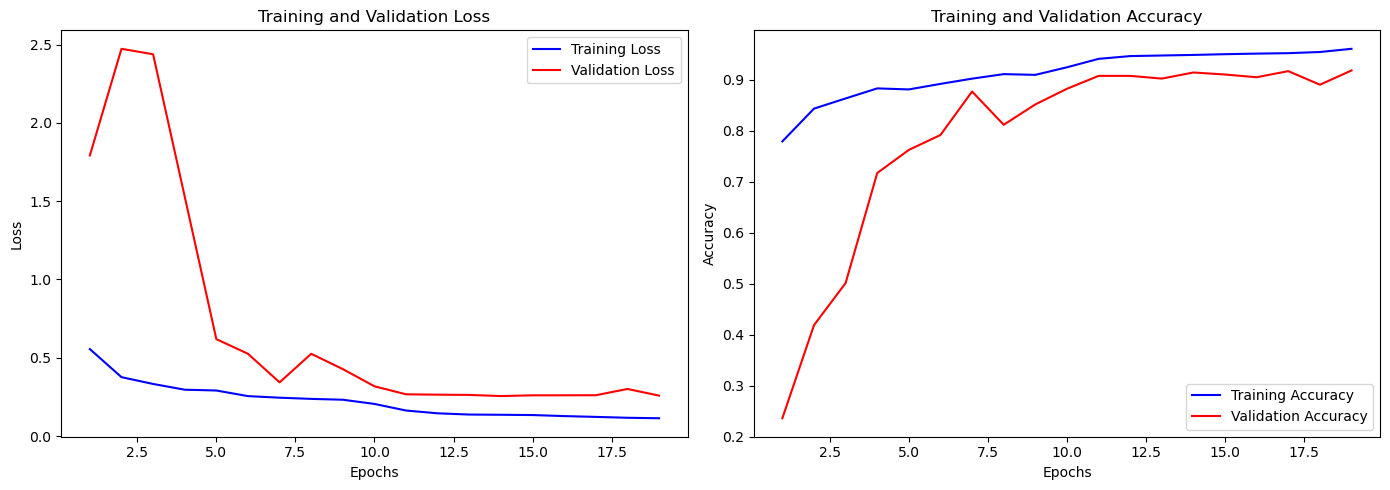

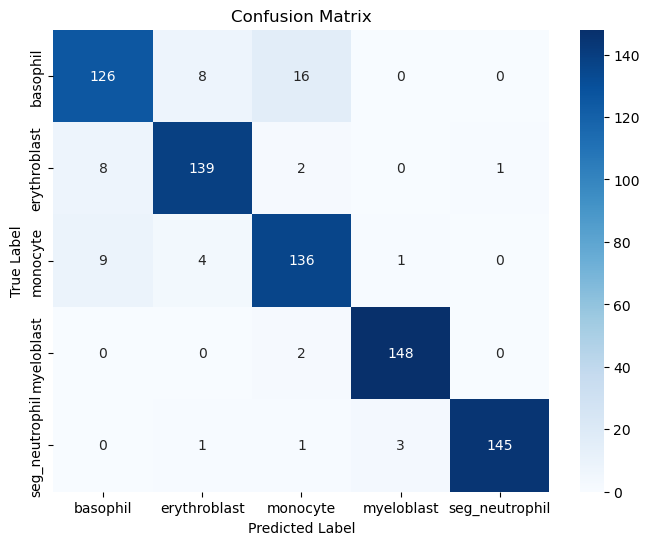

Model saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_hue\Cell_hue_resnet_model.h5
Training history saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_hue\Cell_hue_resnet_history.npz


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

# === Load preprocessed data ===
method = "cell_hue"  # change to the desired segmentation method
root = r"C:\Users\Enas Emad\Documents\AML\numpy_encoded"
X = np.load(os.path.join(root, method, "X.npy"))  # Already normalized
y = np.load(os.path.join(root, method, "y.npy"))
class_names = np.load(os.path.join(root, method, "class_names.npy"))

# === Train/Val/Test Split ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# === Convert labels to one-hot ===
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# === Build ResNet50 model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze all

# === Unfreeze only the last layer block ===
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train model ===
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Custom learning rate scheduler
def scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch != 0:
        return lr * decay_rate
    return lr

lr_callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_callback],
    verbose=1
)


# === Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# === Classification Report ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

import matplotlib.pyplot as plt

# Extract metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_save_path = os.path.join(root, method, "Cell_hue_resnet_model.h5")
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

history_save_path = os.path.join(root, method, "Cell_hue_resnet_history.npz")
np.savez(history_save_path, 
         loss=history.history['loss'], 
         val_loss=history.history['val_loss'], 
         accuracy=history.history['accuracy'], 
         val_accuracy=history.history['val_accuracy'])
print(f"Training history saved to: {history_save_path}")


# Spliting: train, val, test

## First Model : Resnet50 

### Second Data : Training Resnet50 on cell_otsu_dilation segmented data

Epoch 1/50
110/110 [==============================] - 367s 3s/step - loss: 0.7164 - accuracy: 0.7240 - val_loss: 1.8468 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 463s 4s/step - loss: 0.3772 - accuracy: 0.8574 - val_loss: 1.4540 - val_accuracy: 0.4560 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 435s 4s/step - loss: 0.2795 - accuracy: 0.9011 - val_loss: 0.5870 - val_accuracy: 0.7613 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 387s 4s/step - loss: 0.2194 - accuracy: 0.9200 - val_loss: 0.3786 - val_accuracy: 0.8707 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 366s 3s/step - loss: 0.1965 - accuracy: 0.9380 - val_loss: 0.3897 - val_accuracy: 0.8707 - lr: 1.0000e-04
Epoch 6/50
110/110 [==============================] - 489s 4s/step - loss: 0.1533 - accuracy: 0.9451 - val_loss: 0.4415 - val_accuracy: 0.8533 - lr: 1.0000e-04
Epoch 7/50
110/110 [====================

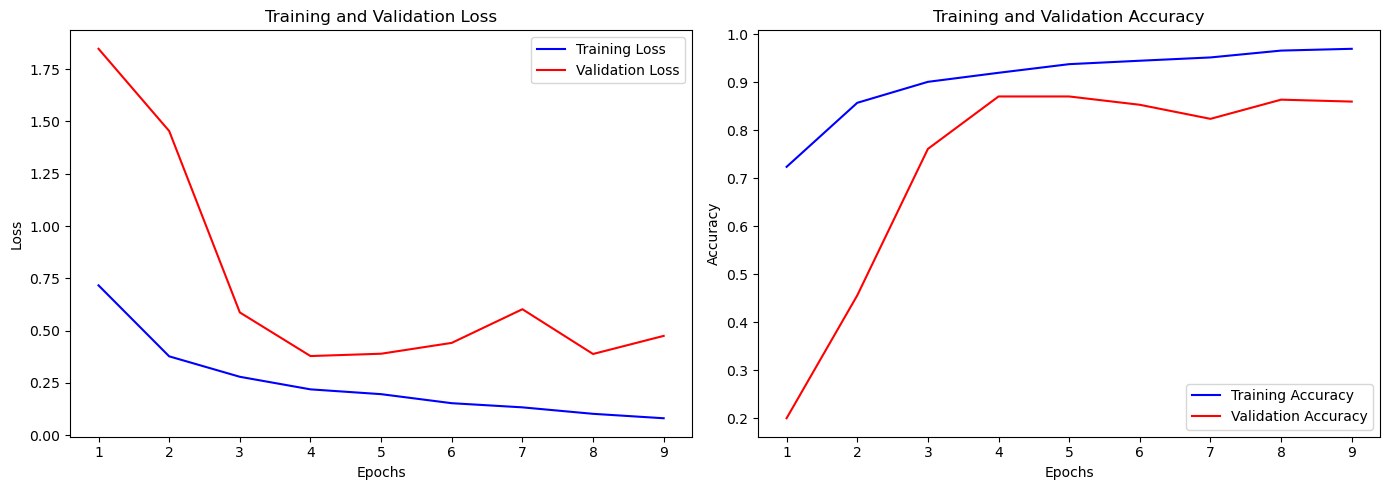

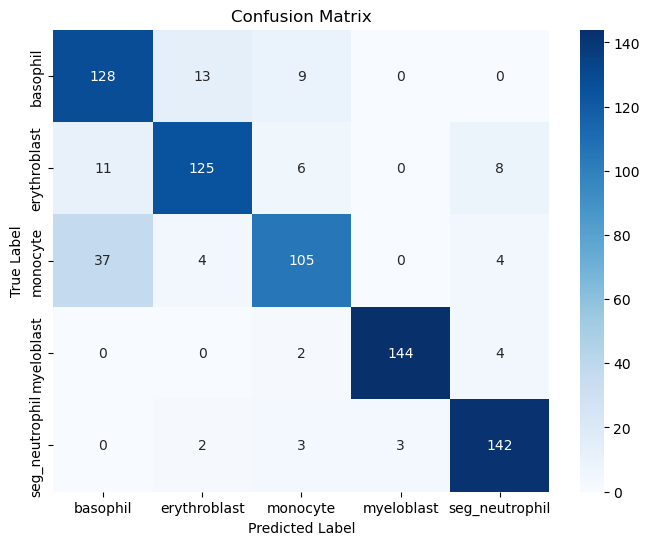

Model saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_otsu_dilation\cell_otsu_dilation_resnet_model.h5
Training history saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\cell_otsu_dilation\cell_otsu_dilation_resnet_history.npz


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

# === Load preprocessed data ===
method = "cell_otsu_dilation"  # change to the desired segmentation method
root = r"C:\Users\Enas Emad\Documents\AML\numpy_encoded"
X = np.load(os.path.join(root, method, "X.npy"))  # Already normalized
y = np.load(os.path.join(root, method, "y.npy"))
class_names = np.load(os.path.join(root, method, "class_names.npy"))

# === Train/Val/Test Split ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# === Convert labels to one-hot ===
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# === Build ResNet50 model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze all

# === Unfreeze only the last layer block ===
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train model ===
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Custom learning rate scheduler
def scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch != 0:
        return lr * decay_rate
    return lr

lr_callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_callback],
    verbose=1
)


# === Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# === Classification Report ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

import matplotlib.pyplot as plt

# Extract metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_save_path = os.path.join(root, method, "cell_otsu_dilation_resnet_model.h5")
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

history_save_path = os.path.join(root, method, "cell_otsu_dilation_resnet_history.npz")
np.savez(history_save_path, 
         loss=history.history['loss'], 
         val_loss=history.history['val_loss'], 
         accuracy=history.history['accuracy'], 
         val_accuracy=history.history['val_accuracy'])
print(f"Training history saved to: {history_save_path}")


# Spliting: train, val, test

## First Model : Resnet50 

### Third Data : Training Resnet50 on nucleus_hue_channel segmented data

Epoch 1/50
110/110 [==============================] - 327s 3s/step - loss: 0.6070 - accuracy: 0.7649 - val_loss: 2.4766 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 337s 3s/step - loss: 0.3738 - accuracy: 0.8543 - val_loss: 6.4426 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 452s 4s/step - loss: 0.3427 - accuracy: 0.8646 - val_loss: 9.3008 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 446s 4s/step - loss: 0.3121 - accuracy: 0.8694 - val_loss: 8.7338 - val_accuracy: 0.2027 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 426s 4s/step - loss: 0.3039 - accuracy: 0.8754 - val_loss: 3.4332 - val_accuracy: 0.3893 - lr: 1.0000e-04
Epoch 6/50
110/110 [==============================] - 440s 4s/step - loss: 0.2648 - accuracy: 0.8926 - val_loss: 2.2524 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 7/50
110/110 [====================

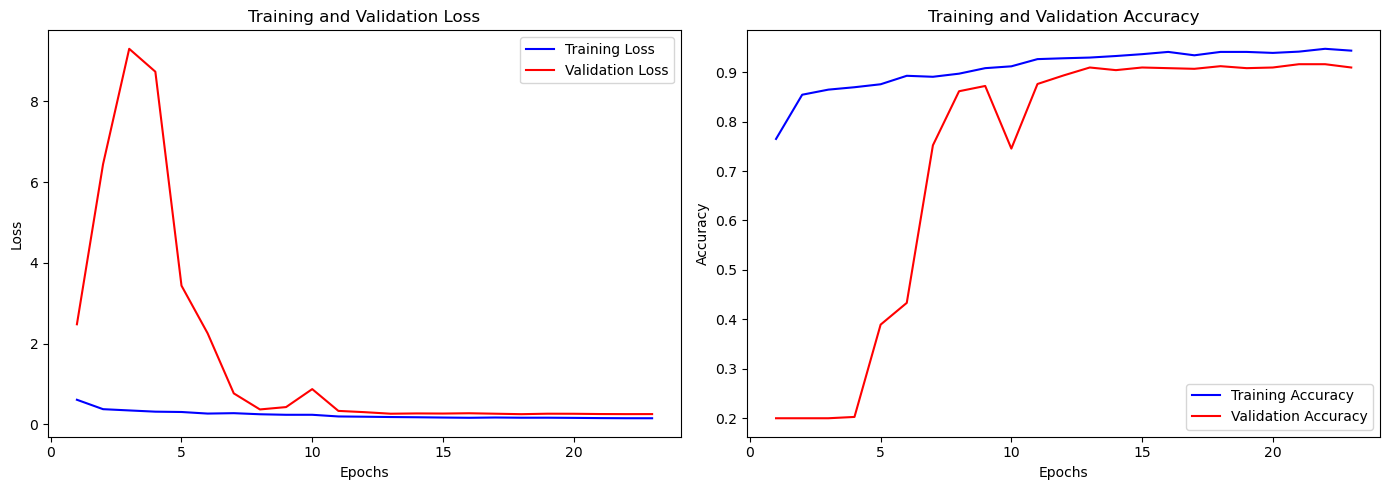

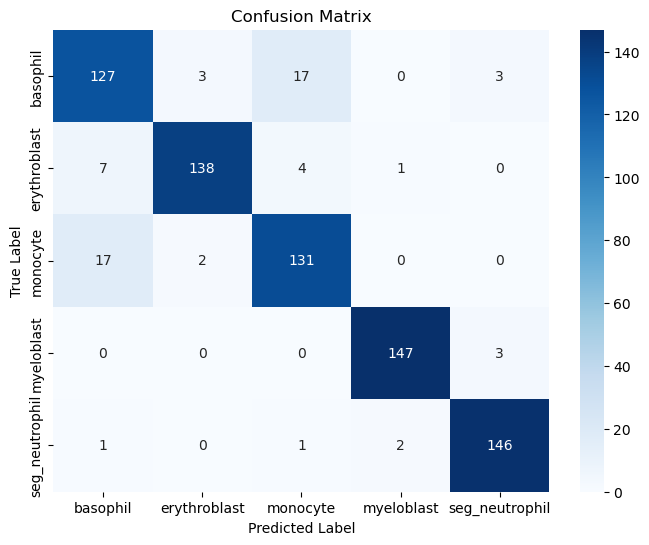

Model saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\nucleus_hue_channel\nucleus_hue_channel_resnet_model.h5
Training history saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\nucleus_hue_channel\nucleus_hue_channel_resnet_history.npz


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

# === Load preprocessed data ===
method = "nucleus_hue_channel"  # change to the desired segmentation method
root = r"C:\Users\Enas Emad\Documents\AML\numpy_encoded"
X = np.load(os.path.join(root, method, "X.npy"))  # Already normalized
y = np.load(os.path.join(root, method, "y.npy"))
class_names = np.load(os.path.join(root, method, "class_names.npy"))

# === Train/Val/Test Split ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# === Convert labels to one-hot ===
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# === Build ResNet50 model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze all

# === Unfreeze only the last layer block ===
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train model ===
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Custom learning rate scheduler
def scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch != 0:
        return lr * decay_rate
    return lr

lr_callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_callback],
    verbose=1
)


# === Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# === Classification Report ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

import matplotlib.pyplot as plt

# Extract metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_save_path = os.path.join(root, method, "nucleus_hue_channel_resnet_model.h5")
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

history_save_path = os.path.join(root, method, "nucleus_hue_channel_resnet_history.npz")
np.savez(history_save_path, 
         loss=history.history['loss'], 
         val_loss=history.history['val_loss'], 
         accuracy=history.history['accuracy'], 
         val_accuracy=history.history['val_accuracy'])
print(f"Training history saved to: {history_save_path}")


# Spliting: train, val, test

## First Model : Resnet50 

### Fourth Data : Training Resnet50 on nucleus_otsu segmented data

Epoch 1/50
110/110 [==============================] - 199s 2s/step - loss: 0.6106 - accuracy: 0.7660 - val_loss: 2.5201 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 170s 2s/step - loss: 0.3368 - accuracy: 0.8663 - val_loss: 7.2938 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 150s 1s/step - loss: 0.3076 - accuracy: 0.8783 - val_loss: 10.4292 - val_accuracy: 0.2080 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 140s 1s/step - loss: 0.2584 - accuracy: 0.9014 - val_loss: 6.3240 - val_accuracy: 0.3440 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 141s 1s/step - loss: 0.2404 - accuracy: 0.9023 - val_loss: 1.6226 - val_accuracy: 0.4533 - lr: 1.0000e-04
Epoch 6/50
110/110 [==============================] - 142s 1s/step - loss: 0.2402 - accuracy: 0.9060 - val_loss: 0.3997 - val_accuracy: 0.8547 - lr: 1.0000e-04
Epoch 7/50
110/110 [===================

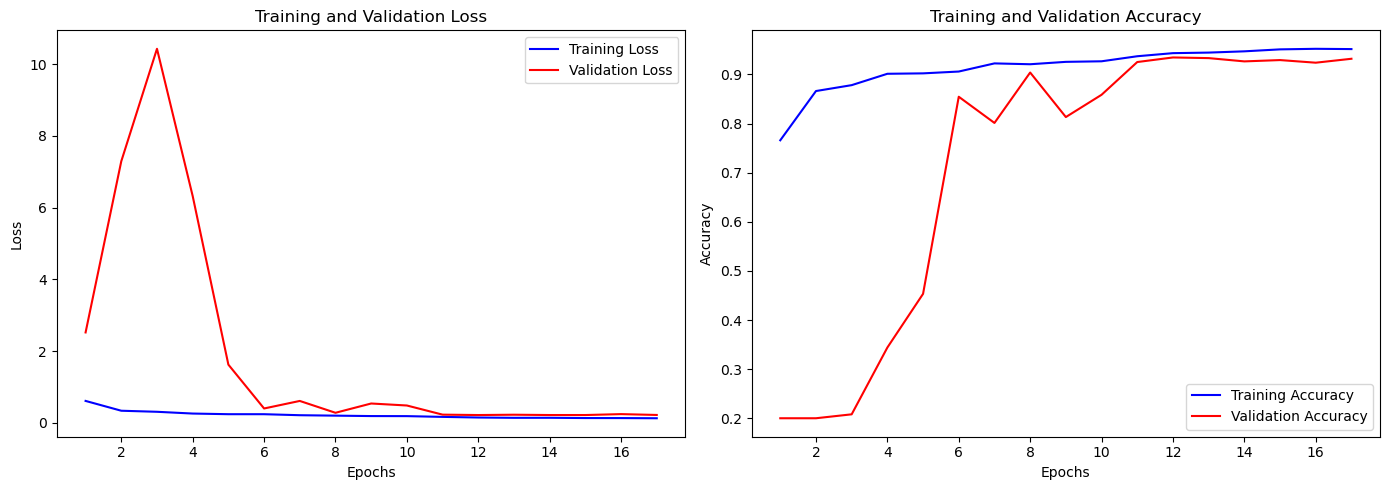

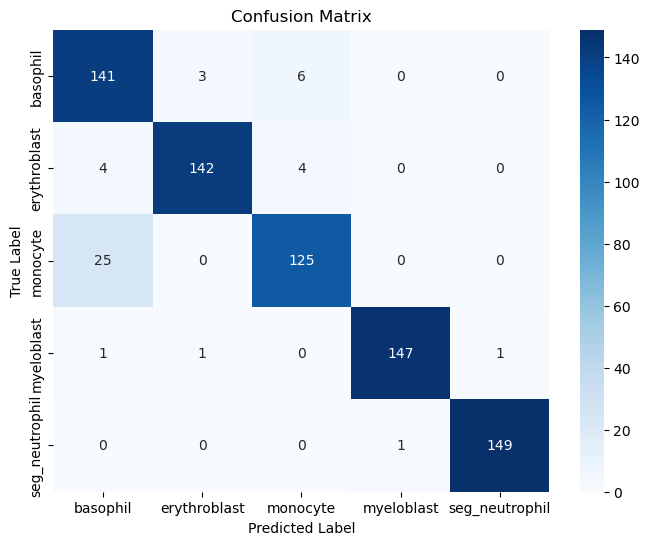

Model saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\nucleus_otsu\nucleus_otsu_resnet_model.h5
Training history saved to: C:\Users\Enas Emad\Documents\AML\numpy_encoded\nucleus_otsu\nucleus_otsu_resnet_history.npz


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

# === Load preprocessed data ===
method = "nucleus_otsu"  # change to the desired segmentation method
root = r"C:\Users\Enas Emad\Documents\AML\numpy_encoded"
X = np.load(os.path.join(root, method, "X.npy"))  # Already normalized
y = np.load(os.path.join(root, method, "y.npy"))
class_names = np.load(os.path.join(root, method, "class_names.npy"))

# === Train/Val/Test Split ===
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# === Convert labels to one-hot ===
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# === Build ResNet50 model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze all

# === Unfreeze only the last layer block ===
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train model ===
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Custom learning rate scheduler
def scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch != 0:
        return lr * decay_rate
    return lr

lr_callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_callback],
    verbose=1
)


# === Evaluate ===
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# === Classification Report ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

import matplotlib.pyplot as plt

# Extract metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model_save_path = os.path.join(root, method, "nucleus_otsu_resnet_model.h5")
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

history_save_path = os.path.join(root, method, "nucleus_otsu_resnet_history.npz")
np.savez(history_save_path, 
         loss=history.history['loss'], 
         val_loss=history.history['val_loss'], 
         accuracy=history.history['accuracy'], 
         val_accuracy=history.history['val_accuracy'])
print(f"Training history saved to: {history_save_path}")


In [ ]:
methods = ["cell_hue", "cell_otsu_dilation", "nucleus_hue_channel", "nucleus_otsu"]